In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import mstats

# Author

## Yana Neykova

# Abstract

In this project I will analyse the effect of GPA on the people's weight.  
I will rely on the dataset "Food choices" . File is located in folder "data". For the online access, please refer to the "Resources" section.Following the link you can find some more information for the columns and their content , in case not everything is clear. Since the dataset contains a lot of information, I will focus only on the columns needed for my final conclusion.

<br> The structure of the project is as it follows:
<br> 1. Abstract
<br> 2. Correlation analysis
<br> 3. EDA - exploring the impact of GPA
<br> 4. Hypothesis testing
<br> 5. Conclusion
<br> 6. Further development
<br> 7. Resources
<br><br> I will start with reading and cleaning the dataset. Then I will try to find some correlation between the nutrition scores and the main food values ( fat, proteins, carbohydrates,etc.). I will make some hypothesis testing, and eventually I will end up with a conclusion if there is a connection between the nutrition score and energy contain of the food. 

As a first step, I will read and clean the data. I will try to leave only columns that I will need to work on later. File is located in "data" folder, but can be also accessed online ( please refer to the "Resources" section for the exact link). 

In [3]:
food_data = pd.read_csv('data/en.openfoodfacts.org.products.tsv', sep = '\t' )

C:\Users\yneykova\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
food_data.shape

(356027, 163)

In [5]:
food_data.energy_100g

0            NaN
1         2243.0
2         1941.0
3         2540.0
4         1552.0
5         1933.0
6         1490.0
7         1833.0
8         2406.0
9         3586.0
10        1393.0
11        1540.0
12        2230.0
13        2590.0
14        2536.0
15        1824.0
16        2632.0
17        2092.0
18        1582.0
19        1096.0
20        1464.0
21        2092.0
22        1674.0
23        2372.0
24        1954.0
25           NaN
26        1548.0
27        2372.0
28        2372.0
29        2230.0
           ...  
355997       NaN
355998       NaN
355999       NaN
356000       NaN
356001       NaN
356002       NaN
356003       NaN
356004     368.0
356005    1643.0
356006       NaN
356007       NaN
356008       NaN
356009       NaN
356010    2406.0
356011       NaN
356012       NaN
356013       NaN
356014       NaN
356015       NaN
356016       NaN
356017      21.0
356018       NaN
356019       NaN
356020       NaN
356021       NaN
356022       0.0
356023       NaN
356024       N

In [6]:
food_data.head()

code                                                url  \
0   3087  http://world-en.openfoodfacts.org/product/0000...   
1   4530  http://world-en.openfoodfacts.org/product/0000...   
2   4559  http://world-en.openfoodfacts.org/product/0000...   
3  16087  http://world-en.openfoodfacts.org/product/0000...   
4  16094  http://world-en.openfoodfacts.org/product/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity         ...         fruits-vegetables-nuts_100g  \
0          NaN      1kg         ...                                 NaN   
1          NaN      NaN         ...                                 NaN   
2          NaN      NaN         ...                                 NaN   
3          NaN      NaN         ...                                 NaN   
4          NaN      NaN         ...                                 NaN   

  fruits-vegetables-nuts-estimate_100g collagen-meat-protein-ratio_100g  \
0                                  NaN                              NaN   
1                                  NaN                              NaN   
2                                  NaN                              NaN   
3                                  NaN                              NaN   
4                                  NaN                              NaN   

  cocoa_100g chlorophyl_100g carbon-footprint_100g nutrition-score-fr_100g  \
0        NaN             NaN                   NaN                     NaN   
1        NaN             NaN                   NaN                    14.0   
2        NaN             NaN                   NaN                     0.0   
3        NaN             NaN                   NaN                    12.0   
4        NaN             NaN                   NaN                     NaN   

  nutrition-score-uk_100g glycemic-index_100g water-hardness_100g  
0                     NaN                 NaN                 NaN  
1                    14.0                 NaN                 NaN  
2                     0.0                 NaN                 NaN  
3                    12.0                 NaN                 NaN  
4                     NaN                 NaN                 NaN  

[5 rows x 163 columns]

In [7]:
food_data.columns.values

array(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags',
       'brands', 'brands_tags', 'categories', 'categories_tags',
       'categories_en', 'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo',
       'cities', 'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text', 'allergens',
       'allergens_en', 'traces', 'traces_tags', 'traces_en',
       'serving_size', 'no_nutriments', 'additives_n', 'additives',
       'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
   

I will drop some values. Instead of dropping function, this time I will rewrite the variable with the colummns I need:

In [8]:
valid_columns = ['nutrition-score-fr_100g', 'calcium_100g', 'vitamin-b1_100g','vitamin-c_100g','vitamin-a_100g',
'sodium_100g', 'salt_100g','iron_100g',  'proteins_100g', 'fiber_100g', 'sugars_100g', 'carbohydrates_100g', 'cholesterol_100g','trans-fat_100g', 
'saturated-fat_100g', 'fat_100g', 'energy_100g', 
'nutrition_grade_fr', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_from_palm_oil_n', 'additives', 'serving_size', 
'allergens', 'ingredients_text', 'countries', 'stores', 'purchase_places', 'labels',
'manufacturing_places', 'origins_tags', 'categories', 'brands', 'packaging', 'quantity', 'generic_name', 'product_name', 'last_modified_datetime', 'created_datetime',
'creator', 'code', 'url']

In [9]:
food_data = food_data[valid_columns]

In [10]:
food_data.shape

(356027, 41)

In [11]:
food_data.head()

nutrition-score-fr_100g  calcium_100g  vitamin-b1_100g  vitamin-c_100g  \
0                      NaN           NaN              NaN             NaN   
1                     14.0         0.000              NaN          0.0214   
2                      0.0         0.071              NaN          0.0000   
3                     12.0         0.143              NaN             NaN   
4                      NaN           NaN              NaN             NaN   

   vitamin-a_100g  sodium_100g  salt_100g  iron_100g  proteins_100g  \
0             NaN          NaN        NaN        NaN            NaN   
1             0.0        0.000    0.00000    0.00129           3.57   
2             0.0        0.250    0.63500    0.00129          17.86   
3             NaN        0.482    1.22428    0.00514          17.86   
4             NaN          NaN        NaN        NaN           8.57   

   fiber_100g                        ...                          \
0         NaN                        ...                           
1         3.6                        ...                           
2         7.1                        ...                           
3         7.1                        ...                           
4         5.7                        ...                           

            brands  packaging  quantity  generic_name  \
0  Ferme t'y R'nao        NaN       1kg           NaN   
1              NaN        NaN       NaN           NaN   
2   Torn & Glasser        NaN       NaN           NaN   
3        Grizzlies        NaN       NaN           NaN   
4   Bob's Red Mill        NaN       NaN           NaN   

                     product_name  last_modified_datetime  \
0              Farine de blé noir    2016-09-17T09:18:13Z   
1  Banana Chips Sweetened (Whole)    2017-03-09T14:32:37Z   
2                         Peanuts    2017-03-09T14:32:37Z   
3          Organic Salted Nut Mix    2017-03-09T10:35:31Z   
4                 Organic Polenta    2017-03-09T10:34:13Z   

       created_datetime                     creator   code  \
0  2016-09-17T09:17:46Z  openfoodfacts-contributors   3087   
1  2017-03-09T14:32:37Z             usda-ndb-import   4530   
2  2017-03-09T14:32:37Z             usda-ndb-import   4559   
3  2017-03-09T10:35:31Z             usda-ndb-import  16087   
4  2017-03-09T10:34:13Z             usda-ndb-import  16094   

                                                 url  
0  http://world-en.openfoodfacts.org/product/0000...  
1  http://world-en.openfoodfacts.org/product/0000...  
2  http://world-en.openfoodfacts.org/product/0000...  
3  http://world-en.openfoodfacts.org/product/0000...  
4  http://world-en.openfoodfacts.org/product/0000...  

[5 rows x 41 columns]

As we can see, we decreased the dataset from 163 to 52 columns. Even after that, it still contains a lot of NaN values. 

In [12]:
nan_values = food_data.isnull().sum()

In [13]:
nan_values = nan_values.sort_values()

In [14]:
nan_values

last_modified_datetime                          0
creator                                         3
created_datetime                               10
url                                            26
code                                           26
countries                                     275
product_name                                17512
brands                                      29050
energy_100g                                 60660
proteins_100g                               61866
salt_100g                                   66288
sodium_100g                                 66333
ingredients_text                            72134
ingredients_from_palm_oil_n                 72160
ingredients_that_may_be_from_palm_oil_n     72160
additives                                   72202
fat_100g                                    76530
carbohydrates_100g                          76807
sugars_100g                                 76841
saturated-fat_100g                          92204


I showed the columns with NaN values and sorted them out, to find out which of them contain the most NaN cells. Reasons can vary - missed informmmation, human error, that there is no actual information for the particular food, etc. The focus here is to outline a "border" and deecide what else I can drop, so that I continue with the analysis.

In [15]:
food_data.shape

(356027, 41)

In [16]:
group_1 = ['last_modified_datetime', 'creator', 'created_datetime', 'url', 'code', 'countries', 'product_name', 'brands', 'energy_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'ingredients_text','additives', 'fat_100g', 'carbohydrates_100g', 'sugars_100g', 'saturated-fat_100g', 'nutrition-score-fr_100g', 'nutrition_grade_fr', 'fiber_100g', 'serving_size']

In [17]:
food_data = food_data[group_1]

In [18]:
food_data.shape

(356027, 22)

Dataset is now reduced to 22 columns ( I excluded the ones with more than 140 000 NaN values, + two more containing data for palm oil. They will not be needed for the purpose of this analysis.)

# Correlation analysis

Lets check what is the correlation coefficient for the rest of the coluumns. I will use seaborn heatmap for better visibility.

In [19]:
food_data.corr()

energy_100g  proteins_100g  salt_100g  sodium_100g  \
energy_100g                 1.000000       0.272950  -0.003627    -0.003628   
proteins_100g               0.272950       1.000000  -0.001802    -0.001803   
salt_100g                  -0.003627      -0.001802   1.000000     1.000000   
sodium_100g                -0.003628      -0.001803   1.000000     1.000000   
fat_100g                    0.739380       1.000000  -0.003929    -0.003930   
carbohydrates_100g          0.469803       1.000000  -0.001108    -0.001110   
sugars_100g                 0.400332      -0.214668   0.000084     0.000083   
saturated-fat_100g          0.539725       0.162645  -0.001944    -0.001945   
nutrition-score-fr_100g     0.533250       0.100139   0.007421     0.007421   
fiber_100g                 -0.001717      -0.001731  -0.000059    -0.000059   

                         fat_100g  carbohydrates_100g  sugars_100g  \
energy_100g              0.739380            0.469803     0.400332   
proteins_100g            1.000000            1.000000    -0.214668   
salt_100g               -0.003929           -0.001108     0.000084   
sodium_100g             -0.003930           -0.001110     0.000083   
fat_100g                 1.000000            1.000000    -0.052117   
carbohydrates_100g       1.000000            1.000000     0.662378   
sugars_100g             -0.052117            0.662378     1.000000   
saturated-fat_100g       0.691692           -0.051517     0.141183   
nutrition-score-fr_100g  0.555585            0.254525     0.437256   
fiber_100g              -0.001641           -0.001759    -0.000394   

                         saturated-fat_100g  nutrition-score-fr_100g  \
energy_100g                        0.539725                 0.533250   
proteins_100g                      0.162645                 0.100139   
salt_100g                         -0.001944                 0.007421   
sodium_100g                       -0.001945                 0.007421   
fat_100g                           0.691692                 0.555585   
carbohydrates_100g                -0.051517                 0.254525   
sugars_100g                        0.141183                 0.437256   
saturated-fat_100g                 1.000000                 0.617023   
nutrition-score-fr_100g            0.617023                 1.000000   
fiber_100g                        -0.001077                -0.001605   

                         fiber_100g  
energy_100g               -0.001717  
proteins_100g             -0.001731  
salt_100g                 -0.000059  
sodium_100g               -0.000059  
fat_100g                  -0.001641  
carbohydrates_100g        -0.001759  
sugars_100g               -0.000394  
saturated-fat_100g        -0.001077  
nutrition-score-fr_100g   -0.001605  
fiber_100g                 1.000000

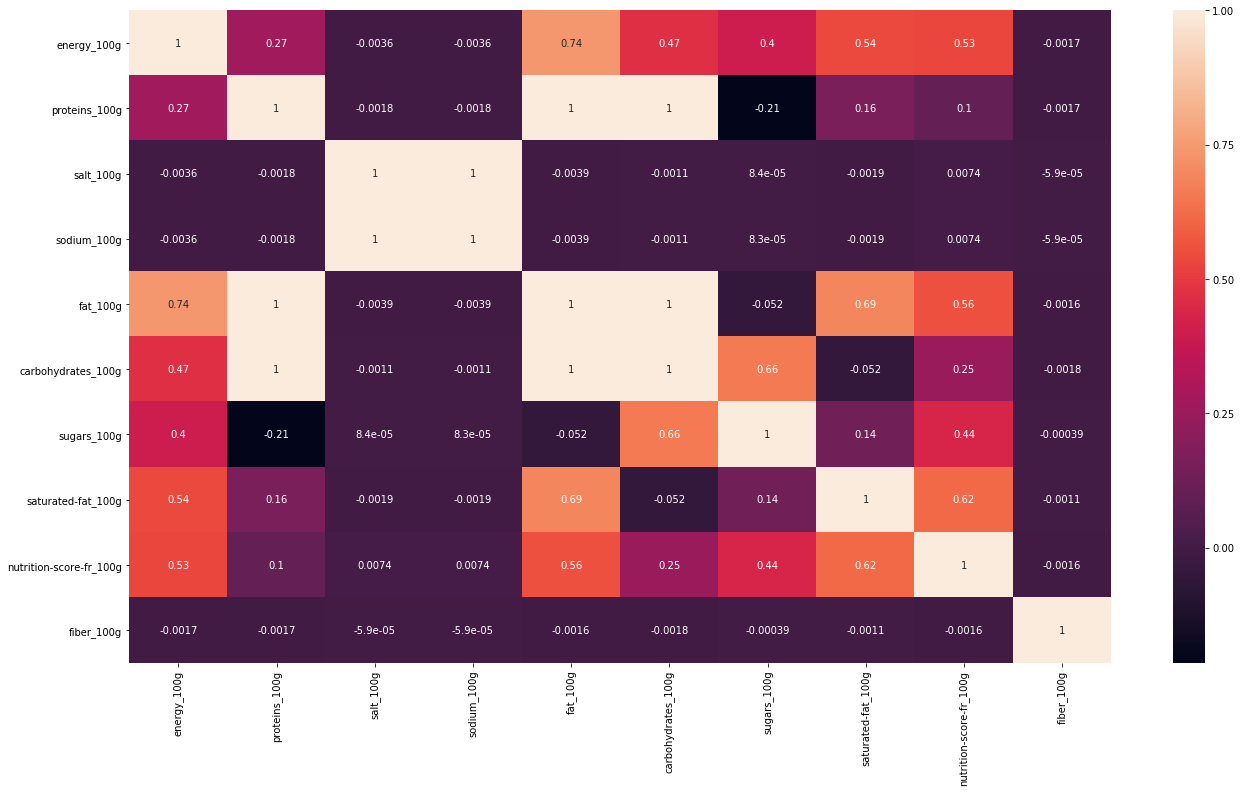

In [20]:
plt.figure(figsize=(22,12))
sns.heatmap(food_data.corr(), annot = True)

As expected , we have one diagonal with corr=1. This is because it shows the correlation of each product with itself, which is the reason I will not takeit into consideration. Some other are substitutes, so they also have high coefficient. 
<br> For this project I will focus on the relation between the nutrition score - out of all, we left only the ones from France , as they had the least NaN values. Lets see what will be the coefficient between the scores and some nutrients. 

Text(0,0.5,'nutrition-score-fr_100g')

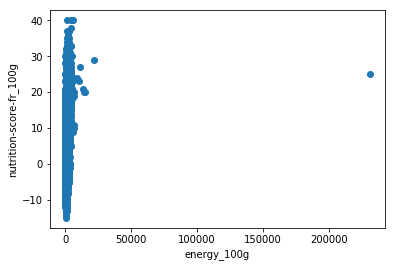

In [21]:
plt.scatter(food_data['energy_100g'], food_data['nutrition-score-fr_100g'])
plt.xlabel('energy_100g')
plt.ylabel('nutrition-score-fr_100g')

Text(0,0.5,'nutrition-score-fr_100g')

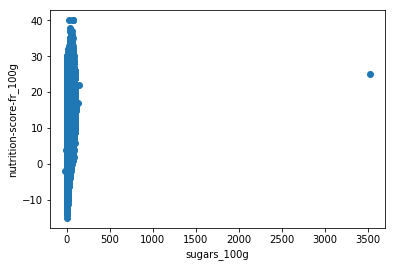

In [22]:
plt.scatter(food_data['sugars_100g'], food_data['nutrition-score-fr_100g'])
plt.xlabel('sugars_100g')
plt.ylabel('nutrition-score-fr_100g')

The two scatterplots above are identical.The third one ( fats and energy) is quite similar, with the most relation i There is no strong connection between them, it is more like vertical - with the exclusion of the valie at 3500.

Text(0,0.5,'fat_100g')

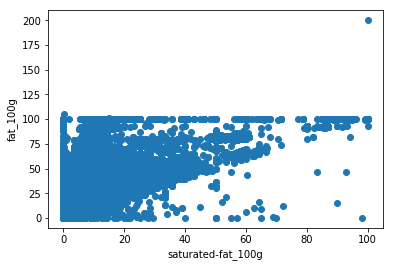

In [23]:
plt.scatter(food_data['saturated-fat_100g'], food_data['fat_100g'])
plt.xlabel('saturated-fat_100g')
plt.ylabel('fat_100g')

This result is strange - there is definetely some relation, strongest in the beginning and weakens at the highest values . This is expected and normal, considering that we commpare fats and saturated fats.

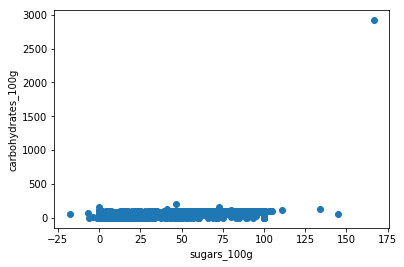

In [24]:
plt.scatter(food_data['sugars_100g'], food_data['carbohydrates_100g'])
plt.xlabel('sugars_100g')
plt.ylabel('carbohydrates_100g')
plt.show()

The relation between the sugars and carbohydrates is again kind of normal - sugars are carbohydrates, but they can hardly cover the main part of carbohydrates. Those are realistic values.

Text(0,0.5,'nutrition-score-fr_100g')

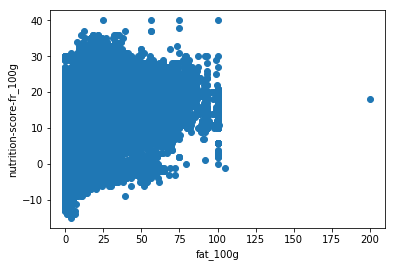

In [25]:
plt.scatter(food_data['fat_100g'], food_data['nutrition-score-fr_100g'])
plt.xlabel('fat_100g')
plt.ylabel('nutrition-score-fr_100g')

Text(0,0.5,'nutrition-score-fr_100g')

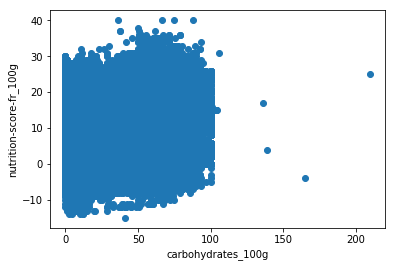

In [26]:
plt.scatter(food_data['carbohydrates_100g'], food_data['nutrition-score-fr_100g'])
plt.xlabel('carbohydrates_100g')
plt.ylabel('nutrition-score-fr_100g')

The last two plots above - correlation between fat and nutrition score, and carbohydrates and nutrition score, are more interesting from my point of view. They can give us some idea if there is a connection between those nutritiens values and the score. As expected, there is almost no values on x line after the 100 point - just few outliers.

# EDA analysis

In [27]:
food_data.dtypes

last_modified_datetime      object
creator                     object
created_datetime            object
url                         object
code                        object
countries                   object
product_name                object
brands                      object
energy_100g                float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
ingredients_text            object
additives                   object
fat_100g                   float64
carbohydrates_100g         float64
sugars_100g                float64
saturated-fat_100g         float64
nutrition-score-fr_100g    float64
nutrition_grade_fr          object
fiber_100g                 float64
serving_size                object
dtype: object

In [28]:
food_data_describe = food_data.describe()

In [29]:
food_data_describe = food_data_describe.round(2)
food_data_describe

energy_100g  proteins_100g  salt_100g  sodium_100g      fat_100g  \
count    295367.00   2.941610e+05  289739.00    289694.00  2.794970e+05   
mean       1125.45   5.326598e+04       1.94         0.76  5.606587e+04   
std         936.83   2.888578e+07     120.55        47.46  2.963385e+07   
min           0.00  -8.000000e+02       0.00         0.00  0.000000e+00   
25%         382.00   7.200000e-01       0.06         0.02  1.000000e-01   
50%        1092.00   4.880000e+00       0.56         0.22  5.290000e+00   
75%        1674.00   1.000000e+01       1.36         0.53  2.000000e+01   
max      231199.00   1.566667e+10   64312.80     25320.00  1.566667e+10   

       carbohydrates_100g  sugars_100g  saturated-fat_100g  \
count        2.792200e+05    279186.00           263823.00   
mean         5.614020e+04        15.67                5.09   
std          2.964854e+07        21.98                7.97   
min          0.000000e+00       -17.86                0.00   
25%          5.600000e+00         1.20                0.00   
50%          2.000000e+01         5.40                1.79   
75%          5.758000e+01        23.33                7.14   
max          1.566667e+10      3520.00              550.00   

       nutrition-score-fr_100g    fiber_100g  
count                254856.00  2.206830e+05  
mean                      9.17  3.843467e+05  
std                       9.00  1.805529e+08  
min                     -15.00 -6.700000e+00  
25%                       1.00  0.000000e+00  
50%                      10.00  1.500000e+00  
75%                      16.00  3.600000e+00  
max                      40.00  8.481815e+10

In [30]:
food_data

last_modified_datetime                     creator  \
0        2016-09-17T09:18:13Z  openfoodfacts-contributors   
1        2017-03-09T14:32:37Z             usda-ndb-import   
2        2017-03-09T14:32:37Z             usda-ndb-import   
3        2017-03-09T10:35:31Z             usda-ndb-import   
4        2017-03-09T10:34:13Z             usda-ndb-import   
5        2017-03-09T10:34:11Z             usda-ndb-import   
6        2017-03-09T10:35:30Z             usda-ndb-import   
7        2017-03-09T10:35:12Z             usda-ndb-import   
8        2017-03-09T10:34:11Z             usda-ndb-import   
9        2017-03-09T10:34:14Z             usda-ndb-import   
10       2017-03-09T10:35:31Z             usda-ndb-import   
11       2017-03-09T10:34:28Z             usda-ndb-import   
12       2017-03-09T10:34:11Z             usda-ndb-import   
13       2017-03-09T10:34:11Z             usda-ndb-import   
14       2017-03-09T10:34:38Z             usda-ndb-import   
15       2017-03-09T10:34:13Z             usda-ndb-import   
16       2017-03-09T09:07:42Z             usda-ndb-import   
17       2017-03-09T10:34:27Z             usda-ndb-import   
18       2017-03-09T10:34:12Z             usda-ndb-import   
19       2017-03-09T10:34:42Z             usda-ndb-import   
20       2017-03-09T10:35:06Z             usda-ndb-import   
21       2017-03-09T10:34:15Z             usda-ndb-import   
22       2017-03-09T10:35:20Z             usda-ndb-import   
23       2017-03-09T10:35:21Z             usda-ndb-import   
24       2017-03-10T09:34:46Z             usda-ndb-import   
25       2017-03-09T10:35:13Z             usda-ndb-import   
26       2017-03-09T10:34:13Z             usda-ndb-import   
27       2017-03-09T10:34:14Z             usda-ndb-import   
28       2017-03-09T10:35:12Z             usda-ndb-import   
29       2017-03-09T10:35:14Z             usda-ndb-import   
...                       ...                         ...   
355997   2015-10-03T15:38:09Z                    scailyna   
355998   2017-04-09T22:27:53Z  openfoodfacts-contributors   
355999   2017-03-26T18:58:17Z          tacite-mass-editor   
356000   2017-03-26T18:58:18Z          tacite-mass-editor   
356001   2017-03-26T18:58:17Z          tacite-mass-editor   
356002   2016-09-01T11:09:27Z             date-limite-app   
356003   2016-04-23T19:09:55Z  openfoodfacts-contributors   
356004   2017-03-09T10:28:09Z             usda-ndb-import   
356005   2015-09-14T13:37:28Z                   drmalabar   
356006   2016-09-24T15:03:13Z  openfoodfacts-contributors   
356007   2015-10-11T11:12:51Z                      aleene   
356008   2016-08-26T23:17:08Z  openfoodfacts-contributors   
356009   2017-03-26T18:58:18Z          tacite-mass-editor   
356010   2017-04-01T20:52:19Z                     kiliweb   
356011   2017-09-06T11:54:00Z                    jeanbono   
356012   2016-08-22T19:20:51Z  openfoodfacts-contributors   
356013   2017-04-30T09:34:20Z               gaspardbenoit   
356014   2016-04-17T13:04:46Z             date-limite-app   
356015   2016-01-03T20:00:15Z                  agamitsudo   
356016   2014-01-17T12:10:47Z                       andre   
356017   2013-06-20T01:09:16Z                    balooval   
356018   2015-04-27T20:53:12Z                  woshilapin   
356019   2015-11-01T11:20:39Z                    sebleouf   
356020   2017-04-03T18:34:58Z             date-limite-app   
356021   2017-04-03T18:34:58Z  openfoodfacts-contributors   
356022   2017-04-03T18:34:59Z             usda-ndb-import   
356023   2017-04-03T18:34:59Z                      tomato   
356024   2017-07-22T13:31:45Z  openfoodfacts-contributors   
356025   2017-04-16T10:54:49Z  openfoodfacts-contributors   
356026   2017-04-03T18:34:59Z             usda-ndb-import   

            created_datetime  \
0       2016-09-17T09:17:46Z   
1       2017-03-09T14:32:37Z   
2       2017-03-09T14:32:37Z   
3       2017-03-09T10:35:31Z   
4       2017-03-09T10:34:13Z   
5       2017-03-09T10:34:11Z   


I will create a histogram for the column energy_100g. As a start, there is no information of the number of energy per 100g is in kJ,or is calories. My assumption is that it is in kJ, but I cannot confirm.

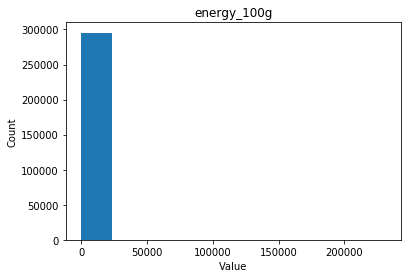

In [33]:
plt.hist(food_data['energy_100g'].dropna())
plt.title('energy_100g')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [34]:
food_data.energy_100g.skew()

56.56271287692809

The distribution here is definetely not normal - there is very big assymmetry. . For both of the explorations it is skewed to the left, which is also proven by the skewness coefficient ( for both it is positive one). My expectation was to see better right tail, but the reason why we do not see it could be explored with deeper analysis.

In [35]:
food_data_countries = food_data.groupby(food_data['countries'], axis=0).mean()

In [36]:
food_data_countries.shape

(1637, 10)

In [37]:
food_data_countries.head()

energy_100g  proteins_100g  salt_100g  \
countries                                                           
ALLEMAGNE                           NaN            NaN        NaN   
Albania                          1888.0           14.0     2.8000   
Albania,France                   1720.0            7.5     0.3000   
Albania,Italia                   1645.0           22.0     0.0000   
Albania,Italia, en:denmark        401.0            7.5     0.8001   

                            sodium_100g  fat_100g  carbohydrates_100g  \
countries                                                               
ALLEMAGNE                           NaN       NaN                 NaN   
Albania                        1.102362      15.0                63.0   
Albania,France                 0.118110      11.0                66.0   
Albania,Italia                 0.000000      21.0                14.0   
Albania,Italia, en:denmark     0.315000       0.8                15.3   

                            sugars_100g  saturated-fat_100g  \
countries                                                     
ALLEMAGNE                           NaN                 NaN   
Albania                             7.0                 6.6   
Albania,France                     16.0                 0.7   
Albania,Italia                      0.8                13.0   
Albania,Italia, en:denmark          1.0                 0.0   

                            nutrition-score-fr_100g  fiber_100g  
countries                                                        
ALLEMAGNE                                       NaN         NaN  
Albania                                        22.0         NaN  
Albania,France                                  0.0         9.0  
Albania,Italia                                 14.0         NaN  
Albania,Italia, en:denmark                      0.0         NaN

I aimed to continue my analysis based on the groupped data per country. This is not adequate at this point, since the data is not good - we have 2 countries per line, some countries are translated to different languages, etc. Thus I will leave this part of the analysis for now. 
<br> I will check if I can clear a little bit more the dataset - we still have many cells with no information inside. 

In [38]:
food_data.columns

Index(['last_modified_datetime', 'creator', 'created_datetime', 'url', 'code',
       'countries', 'product_name', 'brands', 'energy_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'ingredients_text', 'additives', 'fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'saturated-fat_100g',
       'nutrition-score-fr_100g', 'nutrition_grade_fr', 'fiber_100g',
       'serving_size'],
      dtype='object')

In [39]:
food_data.shape

(356027, 22)

In the following lines I will try to find a column to group the data by. After checking some relevant, seems that their content is not appropriate( brands, nutrition grade, product name). I will use the creator one , as it will allow me to create 2 groups for further analysis of the data. 

In [40]:
food_data.product_name.unique()

array(['Farine de blé noir', 'Banana Chips Sweetened (Whole)', 'Peanuts',
       ..., '乐吧泡菜味薯片', 'Biscottes bio', 'Tomates aux Vermicelles '],
      dtype=object)

In [41]:
food_data.nutrition_grade_fr.unique()

array([nan, 'd', 'b', 'c', 'a', 'e'], dtype=object)

In [42]:
food_data.brands.unique()

array(["Ferme t'y R'nao", nan, 'Torn & Glasser', ...,
       'Roussette du Bugey', 'Sans marque,D.Lambert', '乐吧'], dtype=object)

In [43]:
food_data['creator'].unique()

array(['openfoodfacts-contributors', 'usda-ndb-import', 'chris13', ...,
       'robopetr', 'mmarquesma', 'jerem26260'], dtype=object)

In [44]:
for creator in food_data.creator:
    print(creator)

openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
chris13
date-limite-app
canieatthis-app
tacinte
usda-ndb-import
chris13
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
agamitsudo
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
lilimarti
kiliweb
kiliweb
tacinte
usda-ndb-import
usda-ndb-import
tacinte
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-im

usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-impo

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
date-limite-app
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-impo

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
openfoodfacts-contributors
kiliweb
tacinte
kiliweb
kiliweb
kiliweb
usda-ndb-import
kiliweb
usda-ndb-import
jolg42
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
cedric73
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-imp

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
bdwyer
stephane
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
tacinte
openfoodfacts-contributors
openfoodfacts-contributors
stephane
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
smias
openfoodfacts-contributors
pabloviquez
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
tacinte
openfoodfacts-contributors
teolemon
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
date-limite-app
date-limite-app
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kili

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
tacinte
usda-ndb-import
usda-ndb-import
aaronasachimp
tacinte
tacinte
bcatelin
openfoodfacts-contributors
tacinte
tacinte
tacinte
kiliweb
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
kyzh
usda-ndb-import
usda-ndb-import
tacinte
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-n

usda-ndb-import
usda-ndb-import
usda-ndb-import
chiefofgxbxl
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import


usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
bdwyer
usda-ndb-import
usda-ndb-import
usda-ndb-import
u

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

tacinte
tacinte
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
date-limite-app
bcatelin
tacinte
tacinte
date-limite-app
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
date-limite-app
date-limite-app
date-limite-app
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
teolemon
usda-ndb-im

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-impo

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-impo

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
bdwyer
usda-ndb-import
openfoodfacts-contributors
kp757
kp757
usda-ndb-import
usda-ndb-import
aleene
usda-ndb-import
ndiggity
toni
openfoodfacts-contributors
bdwyer
openfoodfacts-contributors
tacinte
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda

usda-ndb-import
usda-ndb-import
usda-ndb-import
veganeamos
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
toni
stephane
usda-ndb-import
kiliweb
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
date-limite-app
openfoodfacts-contributors
usda-ndb-import
date-limite-app
usda-ndb-import
usda-ndb-import
usda-ndb-import
date-limite-app
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
jennyx9
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
usda-ndb-import
usda-ndb-import
kiliweb
usda-ndb-import
bcat

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
kyzh
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
tacite
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
stephane
kyzh
usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
kiliweb
usda-ndb-import
usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
will-eight
chrisdanielmyers0818
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
usda-ndb-import
usda-nd

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
us

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-impo

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
foodorigins
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
foodorigins
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import


usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import


usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
pitajay
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-impo

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
date-limite-app
tacite
stephane
usda-ndb-import
openfoodfacts-contributors
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
jeanbono
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-impor

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
date-limite-app
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
teolemon
tacinte
usda-ndb-import
usda-ndb-import
usda-ndb-import
kaman
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
u

openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
tacinte
tacinte
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
tacinte
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
tacinte
tacinte
eryte
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-n

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import


usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kp757
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
tacinte
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
zygomare
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-impo

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
teolemon
beniben
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
agamitsudo
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
kyzh
andre
openfoodfacts-contributors
date-limite-app
date-limite-app
jackoeconten
openfoodfacts-contributors
b7
usda-ndb-import
usda-ndb-import
date-limite-app
usda-ndb-import
envlh
date-limite-app
usda-ndb-import
usda-ndb-import
kiliweb
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
teolemon
usda-ndb-import
teolemon
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
psychogeek
openfoodfacts-contributors
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
kiliweb
usda-ndb-import
usda-ndb-import
date-limite-a

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
oli
kiliweb
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-imp

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
pitajay
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
peterbeard
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
tacinte
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import


usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
tmeers
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
u

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
date-limite-app
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
b7
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
bdwyer
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
bdwyer
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-i

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
bdwyer
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
recipekeepapp
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
b7
usda-ndb-import
usda-ndb-import
usda-ndb-import


usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
date-limite-app
date-limite-app
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
bonbondealer
usda-ndb-import
date-limite-app
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-im

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
bori
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usd

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
tacite
tacite
deansck
tacinte
usda-ndb-import
julia-t
usda-ndb-import
kiliweb
usda-ndb-i

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
date-limite-app
date-limite-app
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
us

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
aaronasachimp
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
bdwyer
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usd

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
toni
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-im

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
date-limite-app
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
zoneblockscommunity
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usd

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
tacinte
usda-ndb-import
tacinte
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
tacinte
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
jiehong
usda-ndb-import
teolemon
foodorigins
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
tacinte
usda-ndb-import
usda-ndb-import
openfoodfacts-co

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
usda-ndb-import
teolemon
kiliweb
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
stephane
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
cquest
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-i

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda

mimaison
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
tacinte
openfoodfacts-contributors
kyzh
kyzh
kyzh
usda-ndb-import
kyzh
openfoodfacts-contributors
kyzh
kyzh
usda-ndb-import
openfoodfacts-contributors
kyzh
kyzh
ata843
usda-ndb-import
kyzh
usda-ndb-import
kyzh
tacinte
openfoodfacts-contributors
bcatelin
tacinte
tacinte
kyzh
kyzh
usda-ndb-import
tacinte
tacinte
kyzh
kyzh
beniben
stephane
tarfaa
tacinte
openfoodfacts-contributors
kyzh
max4food
openfoodfacts-contributors
kyzh
max4food
kyzh
max4food
max4food
kyzh
tacinte
kyzh
openfoodfacts-contributors
kyzh
openfoodfacts-contributors
kyzh
kyzh
max4food
kyzh
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
max4food
usda-ndb-import
kyzh
kaman
tacinte
kyzh
openfoodfacts-contributors
usda-ndb-import
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
klaromatik
kyzh
openfoodfacts

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
tacinte
usda-ndb-import
openfoodfacts-contributors
agamitsudo
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
usda-ndb-import
jeanbono
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
agamitsudo
asmoth
date-limite-app
agamitsudo
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
datalim
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
agamitsudo
agamitsudo
angie
usda-ndb-import
kiliweb
kiliweb
usda-ndb-import
openfoodfacts-contributors
kiliweb
agamitsudo
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
openfoodfact

alexfloresveliz
openfoodfacts-contributors
usda-ndb-import
kiliweb
date-limite-app
openfoodfacts-contributors
kiliweb
usda-ndb-import
usda-ndb-import
usda-ndb-import
nounours
kiliweb
kiliweb
kiliweb
usda-ndb-import
teolemon
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
usda-ndb-import
bcatelin
usda-ndb-import
loverock
loverock
usda-ndb-import
jeanbono
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
miles67off
date-limite-app
sto
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
agamitsudo
kiliweb
kiliweb
toyo
date-limite-app
openfoodfacts-contributors
kiliweb
date-limite-app
date-limite-app
usda-ndb-import
date-limite-app
date-limite-app
date-limite-app
usda-ndb-imp

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
recipekeepapp
usda-ndb-import
bdwyer
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
guigui971
foodorigins
kiliweb
usda-ndb-import
usda-ndb-import
kiliweb
usda-ndb-import
kiliweb
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
openfoodfacts-contributors
usda-ndb-import
openfoodfacts-contributors
b7
agamitsudo
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import


usda-ndb-import
ggrahamott
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
jcnascimento
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
u

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-impo

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
beniben
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kikuchiyo
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-impo

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
stephane
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-im

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
bdwyer
date-limite-app
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
date-limite-app
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
tacinte
nounours
segundo
u

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
bori
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kp757
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
us

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
kyzh
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
tacinte
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
date-limite-app
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
foodviewer
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-impo

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
pitajay


usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
hummingbrid
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
sebleouf
sebleouf
sebleouf
openfoodfacts-contributors
tacite
openfo

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
bdwyer
usda-ndb-import
usda-ndb-import
bdwyer
usda-ndb-import
roblaw
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-impo

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
lio
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
veganeamos
kakao
kiliweb
openfoo

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
tacinte
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
u

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
b7
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-i

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
date-limite-app
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
usda-ndb-import
kiliweb
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
b7
saiyanriku

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
tacinte
kiliweb
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
woshilapin
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-imp

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-impo

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
date-limite-app
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import


usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
svendowideit
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-im

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
usda-ndb-import
usda-ndb-import
kiliweb
xiaoma
kiliweb
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
woshilapin
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-impo

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-imp

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
svendowideit
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
bleakpatch
bleakpatch
bleakpatch
bleakpatch
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-imp

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfood

usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
stephane
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import

usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
tomato
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
foodorigins
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
openfoodfacts-con

emerzh
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
hommedanslalune
openfoodfacts-contributors
svendowideit
stephane
openfoodfacts-contributors
tacite
tacinte
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
date-limite-app
mathias
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
usda-ndb-import
openfoodfacts-contributors
foremuto
smias
usda-ndb-import
kiliweb
davidt
openfoodfacts-contributors
openfoodfacts-contributors
lilimarti
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
davidt
del51
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
abns
kiliweb
aleene
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
openfood-ch-import
openfoodfacts-contributors
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
vantharith
openfoodfacts-contributors
openfoodfacts-contributors
aleene
tacinte
stephane
stephane
kiliweb
op

openfoodfacts-contributors
tacite
tacite
dsuther2
key17
litlastjornu
tacite
tacite
agamitsudo
agamitsudo
beniben
beniben
beniben
beniben
tacite
openfoodfacts-contributors
dovg
arthurdk
teolemon
teolemon
teolemon
teolemon
teolemon
teolemon
antoshaos
olfa-kri
valeriareali
jacob80
jacob80
aleene
shane1181
fdc
fdc
tacite
sylviegi
oscar
tacite
tacite
fdcjura
twoflower
beniben
beniben
beniben
beniben
beniben
twoflower
tacite
tacite
aroukata
wist
jeanbono
olfa-kri
olfa-kri
olfa-kri
openfoodfacts-contributors
olfa-kri
olfa-kri
beniben
beniben
openfoodfacts-contributors
domimode
beniben
beniben
wist
wist
wist
wist
wist
jeb
beniben
beniben
beniben
openfoodfacts-contributors
badbrainjohnson
badbrainjohnson
badbrainjohnson
wist
badbrainjohnson
wist
wist
openfoodfacts-contributors
wist
openfoodfacts-contributors
pladroitte-kjg
twoflower
beniben
tacite
beniben
agamitsudo
jacob80
openfoodfacts-contributors
mamuche
mamuche
jacob80
wist
openfoodfacts-contributors
tacinte
tacite
tacite
tacite
tacinte
ta

usda-ndb-import
kiliweb
date-limite-app
usda-ndb-import
usda-ndb-import
kiliweb
standardanalysis
standardanalysis
hangy
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
manu1400
foodviewer
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
usda-ndb-import
max4food
date-limite-app
tacite
usda-ndb-import
twoflower
usda-ndb-import
bcatelin
hangy
twoflower
twoflower
openfoodfacts-contributors
date-limite-app
hommedanslalune
hangy
openfoodfacts-contributors
bitnapper
openfoodfacts-contributors
twoflower
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
kiliweb
openfoodfacts-contributors
usda-ndb-import
bcatelin
date-limite-app
smias
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
zzeldi
openfoodfacts-contributors
standardanalysis
sebleouf
openfoodfacts-contributors
malikele
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
date-limite-app
hangy
kiliweb
jea

olivierpalarbre
anticultist
openfoodfacts-contributors
max4food
bcatelin
openfoodfacts-contributors
openfoodfacts-contributors
ethanpopov
twoflower
lilimarti
date-limite-app
date-limite-app
sebleouf
kiliweb
date-limite-app
twoflower
openfoodfacts-contributors
kiliweb
date-limite-app
standardanalysis
bcatelin
twoflower
twoflower
sebleouf
date-limite-app
clb
mike41
steff75
date-limite-app
aleene
bcatelin
tacite
kalepom
lilimarti
openfoodfacts-contributors
twoflower
standardanalysis
twoflower
date-limite-app
hangy
date-limite-app
khrista
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
hangy
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
javichu
javichu
javichu
kiliweb
hangy
date-limite-app
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
piokaz
openfoodfacts-contributors
bcatelin
date-limite-app
date-limite-app
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
max4food
max4food
stone
pasc

date-limite-app
openfoodfacts-contributors
date-limite-app
sebleouf
date-limite-app
tacite
openfoodfacts-contributors
date-limite-app
bcatelin
loverock
openfoodfacts-contributors
tacite
annalisaskitchen
openfoodfacts-contributors
tacite
openfoodfacts-contributors
kiliweb
tacite
standardanalysis
kiliweb
tacite
date-limite-app
date-limite-app
kalepom
bcatelin
keronos
bcatelin
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
tacite
edzeronk
javichu
date-limite-app
bitnapper
kiliweb
kiliweb
date-limite-app
teolemon
wayne
usda-ndb-import
kiliweb
neptuno
openfoodfacts-contributors
javichu
javichu
openfoodfacts-contributors
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
teslim1205
tbgv31
openfoodfacts-contributors
tbgv31
kiliweb
openfoodfacts-contributors
rev01yeti
aleene
date-limite-app
date-limite-app
date-limite-app
tacite
kiliweb
openfoodfacts-contributors
rizriz2
openfoodfacts-contributors
kiliweb
bcatelin
tacite
openfoodfacts-contributors
date-limite-app

saiyanriku
kiliweb
openfoodfacts-contributors
alpain
segundo
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
javichu
javichu
javichu
javichu
neptuno
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
date-limite-app
javichu
date-limite-app
kiliweb
openfoodfacts-contributors
neptuno
tacite
openfoodfacts-contributors
tacite
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
iubito
openfoodfacts-contributors
openfoodfacts-contributors
bcatelin
date-limite-app
date-limite-app
anticultist
max4food
javichu
sebleouf
kiliweb
kiliweb
openfoodfacts-contributors
tacite
sebleouf
marite
sebleouf
openfoodfacts-contributors
hommedanslalune
kiliweb
sebleouf
openfoodfacts-contributors
openfoodfacts-contributors
max4food
odoc
javichu
javichu
tacite
iubito
openfoodfacts-contributors
openfoodfacts-contributors
tacite
openfoodfacts-contributors
roft
kiliweb
openfoodfacts-contributors

sto
openfoodfacts-contributors
date-limite-app
anticultist
wist
openfoodfacts-contributors
bcatelin
recipekeepapp
openfoodfacts-contributors
kiliweb
dimoqwertz
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
sto
tacite
date-limite-app
hangy
kiliweb
anticultist
openfoodfacts-contributors
theodad
olofolleola4
openfoodfacts-contributors
date-limite-app
date-limite-app
anticultist
anticultist
date-limite-app
foodviewer
openfoodfacts-contributors
date-limite-app
smias
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
bcatelin
karljoones
sebleouf
sebleouf
openfoodfacts-contributors
openfoodfacts-contributors
neptuno
neptuno
neptuno
openfoodfacts-contributors
javichu
neptuno
usda-ndb-import
openfoodfacts-contributors
neptuno
kiliweb
neptuno
neptuno
neptuno
neptuno
javichu
javichu
javichu
date-limite-app
date-limite-app
openfoodfacts-contributors
twoflower
openfoodfacts-contributors
date-limite-app
date-limite-app
kiliweb
openfoodfacts-contributors
bcatelin
kiliweb
tw

openfoodfacts-contributors
openfoodfacts-contributors
tacite
openfoodfacts-contributors
date-limite-app
openfood-ch-import
dimoqwertz
edzeronk
date-limite-app
kiliweb
wist
wist
wist
malikele
date-limite-app
jgachelin
sto
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
lmu22
javichu
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
javichu
openfoodfacts-contributors
wist
openfoodfacts-contributors
openfood-ch-import
wist
tacite
openfoodfacts-contributors
kiliweb
kiliweb
tacite
date-limite-app
kiliweb
nicolas97
tacite
kiliweb
openfoodfacts-contributors
kiliweb
date-limite-app
kiliweb
openfoodfacts-contributors
kiliweb
big-brother
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb

kiliweb
date-limite-app
date-limite-app
twoflower
date-limite-app
date-limite-app
pfremy
usda-ndb-import
smias
tacite
usda-ndb-import
usda-ndb-import
usda-ndb-import
cerise
wist
openfoodfacts-contributors
date-limite-app
date-limite-app
date-limite-app
openfoodfacts-contributors
basileus
usda-ndb-import
basileus
foodorigins
hangy
openfoodfacts-contributors
javichu
tacite
date-limite-app
date-limite-app
openfoodfacts-contributors
neptuno
javichu
date-limite-app
date-limite-app
antoineg
smias
date-limite-app
date-limite-app
hangy
hangy
g263738
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
javichu
javichu
javichu
kyzh
malikele
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
elizabest
date-limite-app
malikele
malikele
g263738
openfoodfacts-contributors
fabien
sebleouf
javichu
javichu
veganeamos
openfoodfacts-contributors
date-limite-app
kiliweb
openfoodfacts-contributors
neptuno
javichu
date-limite-app
date

openfoodfacts-contributors
virangissi
kiliweb
jacob80
jeff-lechamois
date-limite-app
tacite
kiliweb
malikele
kiliweb
openfoodfacts-contributors
tacite
tacite
kiliweb
openfoodfacts-contributors
jacob80
kiliweb
jacob80
jacob80
sto
openfoodfacts-contributors
sto
tacite
steff75
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
tib-de-bar
kiliweb
openfoodfacts-contributors
jacob80
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
jacob80
kiliweb
nutripat
kiliweb
tacite
kiliweb
openfoodfacts-contributors
dragonne89
openfoodfacts-contributors
openfoodfacts-contributors
foodorigins
tacite
jacob80
kiliweb
tacite
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
autoreverse
kiliweb
stephane
openfoodfacts-contributors
openfoodfacts-contributors
jacob80
autoreverse
ergol
date-limite-app
openfoodfacts-contributors


tacinte
shaolan
date-limite-app
kiliweb
kiliweb
date-limite-app
kiliweb
jeanbono
kiliweb
date-limite-app
javichu
stephane
scanparty-franprix-05-2016
agamitsudo
kiliweb
date-limite-app
hangy
usda-ndb-import
tacite
tacite
tacite
openfoodfacts-contributors
openfood-ch-import
stephane
lelutin
openfoodfacts-contributors
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
openfoodfacts-contributors
malikele
openfoodfacts-contributors
openfoodfacts-contributors
basileus
openfoodfacts-contributors
date-limite-app
openfood-ch-import
date-limite-app
wist
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfood-ch-import
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
dimoqwertz
youtoofan
openfood-ch-import
openfood-ch-import
date-limite-app
openfood-ch-import
openfood-ch-import

tacite
tacite
tacite
chivos
jacob80
andre
openfoodfacts-contributors
openfoodfacts-contributors
stephane
jjp
tacite
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
jeanbono
tina6090
sebleouf
openfoodfacts-contributors
renaud-maury
renaud-maury
renaud-maury
renaud-maury
renaud-maury
openfoodfacts-contributors
openfoodfacts-contributors
tacite
openfoodfacts-contributors
beniben
date-limite-app
date-limite-app
kiliweb
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
jeanbono
gyrostat
openfoodfacts-contributors
kyclem78
openfoodfacts-contributors
foodviewer
openfoodfacts-contributors
hystiff
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
kiliweb
stephane
tacite
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-co

openfoodfacts-contributors
teolemon
alexcorioze
kiliweb
nicolas97
ralette
openfoodfacts-contributors
nicolas97
tacite
tacite
openfoodfacts-contributors
tacite
tacite
kiliweb
openfoodfacts-contributors
sebleouf
openfoodfacts-contributors
segundo
cerbere
jeanfoutre
basileus
adrien
openfoodfacts-contributors
sebleouf
tacite
sebleouf
laminche
kiliweb
sebleouf
basileus
tacite
kiliweb
rfl
rfl
rfl
openfoodfacts-contributors
blandine
kiliweb
tacite
siggg
siggg
openfood-ch-import
sebleouf
openfoodfacts-contributors
tacinte
date-limite-app
kiliweb
date-limite-app
openfoodfacts-contributors
tacite
elodiesebbaski
sqoia
stichomythie
date-limite-app
andre
openfood-ch-import
kheops
balooval
sto
twoflower
delicesnovice
jacob80
pamputt
tacinte
openfoodfacts-contributors
kiliweb
tulipe
teolemon
manu1400
openfoodfacts-contributors
toto100
teolemon
kiliweb
kiliweb
teolemon
jeanbono
oc84
tacite
tacinte
jeanbono
tacite
tacite
kangounet
openfoodfacts-contributors
openfoodfacts-contributors
foodviewer
stephan

marcussacapuces91
kiliweb
sebasto
openfoodfacts-contributors
openfoodfacts-contributors
a-so-caza
segundo
date-limite-app
minouche
nykolas1981
elia
crokmou
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
agamitsudo
gyrostat
nash
openfoodfacts-contributors
sebleouf
openfoodfacts-contributors
jeanbono
openfoodfacts-contributors
jacob80
openfoodfacts-contributors
openfoodfacts-contributors
elia
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
sebleouf
openfoodfacts-contributors
date-limite-app
frvipofm
openfoodfacts-contributors
openfoodfacts-contributors
aristoi
jeanbono
openfoodfacts-contributors
jeanbono
openfoodfacts-contributors
dada
openfoodfacts-contributors
stephane
kiliweb
openfoodfacts-contributors
andre
jacob80
date-limite-app
delicesnovice
sebleouf
malikele
openfoodfacts-contributors
kiliweb
basileus
jeanbono
openfoodfacts-contributors
fabien
elia
adrien
shaolan
aurelindahouse
marcussacapuces

openfoodfacts-contributors
del51
beniben
kiliweb
cyberkiosc
date-limite-app
openfoodfacts-contributors
catynenette
openfoodfacts-contributors
openfoodfacts-contributors
tacinte
kiliweb
tacinte
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
pamputt
miles67off
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
miles67off
andre
miles67off
openfoodfacts-contributors
nash
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
cestki13
openfoodfacts-contributors
openfoodfacts-contributors
shaolan
chivos
jml40250
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
phoenix
grdscarabe
openfoodfacts-contributors
balooval
teolemon
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfoo

openfoodfacts-contributors
tacite
kiliweb
kiliweb
catynenette
openfoodfacts-contributors
kiliweb
miles67off
sebleouf
sebleouf
stephane
sto
kiliweb
openfoodfacts-contributors
kiliweb
sebleouf
openfoodfacts-contributors
agamitsudo
sebleouf
kiliweb
minouche
minouche
openfoodfacts-contributors
usda-ndb-import
pfodtakem
date-limite-app
openfoodfacts-contributors
alexcorioze
scailyna
openfoodfacts-contributors
adrien
openfoodfacts-contributors
agamitsudo
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
usda-ndb-import
andre
kiliweb
nash
kiliweb
tacite
openfoodfacts-contributors
tacite
sebleouf
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
stephane
tacite
tacite
openfoodfacts-contributors
andre
kiliweb
andre
nicolas60620
crochet-david
openfoodfacts-contributors
tacite
andre
openfoodfacts-contributors
openfoodfacts-contributors
valyper1
toomail
openfoodfacts-contributors
openfoodfacts-contributors
big-brother
openfoodfacts-contributors
kiliweb
kiliweb
kiliw

teolemon
openfoodfacts-contributors
jitrixis
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
tacite
teolemon
tacite
tacite
karl-olof
openfoodfacts-contributors
openfoodfacts-contributors
sebleouf
fleury-michon
sebleouf
openfoodfacts-contributors
openfoodfacts-contributors
tacite
nash
date-limite-app
tacite
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
kiliweb
openfoodfacts-contributors
tacite
openfoodfacts-contributors
tacite
openfoodfacts-contributors
tacite
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
tacite
date-limite-app
jeanbono
tacite
naudinsylvain
tacite
loud
kiliweb
openfoodfacts-contributors
kiliweb
teolemon
kiliweb
kiliweb
fleury-michon
tacite
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
tib-de-bar
tacite
openfoodfacts-contributors
date-limite-app
date-limite-app
arnoval
openfoodfacts-contributors
sebleouf
sigoise
d1don
tacite
openfoodfacts-contributo

jh-desmedt
tacite
miles67off
traaf
kiliweb
openfoodfacts-contributors
jeanbono
openfoodfacts-contributors
miles67off
miles67off
tacinte
sebleouf
openfoodfacts-contributors
kiliweb
sebleouf
jeanbono
alex95310
openfoodfacts-contributors
gn1234567
openfoodfacts-contributors
openfoodfacts-contributors
domdom26
kiliweb
keragui
domdom26
openfoodfacts-contributors
ktalan
tacite
coxinet
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
tacite
kiliweb
tacite
tacite
kiliweb
kiliweb
date-limite-app
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
sebleouf
kiliweb
kiliweb
kiliweb
conso3362
openfoodfacts-contributors
grdscarabe
kiliweb
kiliweb
openfoodfacts-contributors
domdom26
openfoodfacts-contributors
openfoodfacts-contributors
openfood-ch-import
openfoodfacts-contributors
openfoodfacts-contributors
tacite
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
manu1400
openfoodfacts-contributors
jeanbono
openfoodfacts-contributo

laurent1971
sebleouf
date-limite-app
woshilapin
openfoodfacts-contributors
date-limite-app
date-limite-app
date-limite-app
openfoodfacts-contributors
bcatelin
jacob80
date-limite-app
openfoodfacts-contributors
franckinou
wablu4
date-limite-app
openfoodfacts-contributors
kiliweb
kiliweb
stephane
openfoodfacts-contributors
openfoodfacts-contributors
patrice
laurent1971
openfoodfacts-contributors
kiliweb
jeanbono
stephane
openfoodfacts-contributors
bananeharissa
openfoodfacts-contributors
carlosbc
tacite
kiliweb
titi
andre
date-limite-app
andre
date-limite-app
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
sebleouf
sebleouf
sebleouf
sebleouf
sebleouf
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
sebleouf
sebleouf
sebleouf
sebleouf
sebleouf
kiliweb
sebleouf
openfoodfacts-contributors
tacite
teolemon
segundo
tacite
openfood-ch-import
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
caya

openfoodfacts-contributors
openfood-ch-import
kiliweb
kiliweb
lilimarti
jeanbono
fnhieu
stephane
openfoodfacts-contributors
cestki13
phoenix
openfoodfacts-contributors
openfoodfacts-contributors
twoflower
max4food
stephane
julienbalas
simonm
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
tacite
cestki13
shaolan
openfoodfacts-contributors
saiyanriku
loupiludo
kiliweb
openfoodfacts-contributors
manu1400
edzeronk
kiliweb
agamitsudo
marcussacapuces91
openfoodfacts-contributors
stephane
malinou
openfood-ch-import
teolemon
sebleouf
minouche
kakao
tacite
andre
date-limite-app
openfoodfacts-contributors
agamitsudo
kiliweb
loupiludo
emerycm
openfoodfacts-contributors
openeyes
caroline
andre
andre
openfoodfacts-contributors
openfoodfacts-contributors
tacinte
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
jeanbono
andre
andre
alexcorioze
segundo
openfoodfacts-c

tacite
kiliweb
kiliweb
openfoodfacts-contributors
tacite
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
tacite
openfoodfacts-contributors
kiliweb
tacite
openfoodfacts-contributors
adline
kiliweb
nviana
sebleouf
openfoodfacts-contributors
big-brother
date-limite-app
tacite
tacite
openfood-ch-import
jacob80
kiliweb
kiliweb
agamitsudo
mb91
openfoodfacts-contributors
openfoodfacts-contributors
tacite
tacite
openfoodfacts-contributors
date-limite-app
tacite
kiliweb
date-limite-app
tacite
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
date-limite-app
date-limite-app
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
totodydy
agamitsudo
kiliweb
openfoodfacts-contributors
tacite
tacite
tacite
tacite
phoenix
phoenix
kiliweb
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
tacite
tacite
sebleouf
sebleouf
sebleouf
tacite
sebleouf
tacite
sebleouf
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb


tacite
openfoodfacts-contributors
nicod
openfoodfacts-contributors
phoenix
stephane
stephane
jacob80
bessheron
tacite
openfoodfacts-contributors
phoenix
jeanmarieluijkx
tacite
openfoodfacts-contributors
date-limite-app
tacite
sebleouf
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
agamitsudo
andre
jeanbono
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
pth
kiliweb
kiliweb
stephane
openfoodfacts-contributors
openfoodfacts-contributors
shaolan
kiliweb
openfoodfacts-contributors
shaolan
domdom26
openfoodfacts-contributors
openfoodfacts-contributors
andre
sitro
gyrostat
stephane
catynenette
teolemon
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
stephane
openfoodfacts-contributors
openfoodfacts-contributors
stephanefr
openfoodfacts-contributors
openfoodfacts-contributors
miles67off
open

thomaszed
sebleouf
openfoodfacts-contributors
sebleouf
openfoodfacts-contributors
openfoodfacts-contributors
agamitsudo
sebleouf
sebleouf
openfoodfacts-contributors
openfoodfacts-contributors
forfaita
kiliweb
sebleouf
sebleouf
kiliweb
luke42410
kiliweb
jeanbono
princesseb612
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
sebleouf
kiliweb
agamitsudo
ouran
kiliweb
openfoodfacts-contributors
sebleouf
openfoodfacts-contributors
kiliweb
big-brother
kiliweb
tulipe
stephane
kiliweb
openfoodfacts-contributors
sebleouf
openfoodfacts-contributors
date-limite-app
kiliweb
kiliweb
tulipe
franck56
kiliweb
andre
kiliweb
kiliweb
jiehong
big-brother
tulipe
openfoodfacts-contributors
openfoodfacts-contributors
sebleouf
sebleouf
sebleouf
sebleouf
date-limite-app
marqui
sebleouf
sebleouf
pr9
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
kiliweb
kiliweb
sebleouf
kiliweb
shaolan
kiliweb
kiliweb
sebleouf
sebleouf
kiliweb
sebleouf
openfoodfacts

miles67off
miles67off
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
scailyna
miles67off
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
kiliweb
kiliweb
kiliweb
kiliweb
miles67off
olivier-fra
kiliweb
boe
openfoodfacts-contributors
jiehong
phoenix
jacob80
openfoodfacts-contributors
emilie-adroguer
openfoodfacts-contributors
gustave
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
sebleouf
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
jacob80
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
sebleouf
sebleouf
sebleouf
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
sebleouf
jf13fr
jacob80
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb

openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
bcatelin
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
date-limite-app
asmoth
kiliweb
sebleouf
floflo49fb
date-limite-app
domdom26
date-limite-app
gphux
andre
openfoodfacts-contributors
tacite
kamounia
openfoodfacts-contributors
openfoodfacts-contributors
jacob80
sebleouf
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
tacite
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
date-limite-app
tacite
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
florian-houget-laposte-net
openfoodfacts-contributors
date-limite-app
steff75
jeanbono
andre
date-limite-app
andre
openfoodfacts-contributors
tacite
aboubacar
je

openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
date-limite-app
kiliweb
kiliweb
kiliweb
kiliweb
sebleouf
kiliweb
kiliweb
teolemon
date-limite-app
kiliweb
tatiana-1978
tacite
kiliweb
kiliweb
date-limite-app
openfoodfacts-contributors
date-limite-app
kiliweb
agamitsudo
angedem
sebleouf
sebleouf
jeanbono
sebleouf
teolemon
date-limite-app
date-limite-app
stephane
tacite
date-limite-app
openfoodfacts-contributors
tacite
openfoodfacts-contributors
kiliweb
tacite
kalepom
openfoodfacts-contributors
kiliweb
tacite
tacite
tacite
kiliweb
kiliweb
openfoodfacts-contributors
tacite
kiliweb
kiliweb
openfoodfacts-contributors
agamitsudo
phoenix
openfoodfacts-contributors
julienbalas
andre
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
stephane
aleene
johnsmith
kiliweb
kiliweb
kiliweb
teolemon
stephane
stephane
stephane
tacite
openfoodfacts-contributors
pth
openfoodfacts-contributors
andre
openfoodfacts-contributors
clemence
clemence
openfoodfacts-contributors
kiliw

aleene
miles67off
miles67off
tacite
date-limite-app
openfoodfacts-contributors
ysculo
stephane
stephane
sebleouf
jeanbono
tacite
beniben
miles67off
stephane
alsy
openfoodfacts-contributors
date-limite-app
sebleouf
kiliweb
kiliweb
sebleouf
phoenix
kiliweb
miles67off
ylebris
openfoodfacts-contributors
openfoodfacts-contributors
gildubs
openfoodfacts-contributors
jacob80
jacob80
jacob80
openfoodfacts-contributors
segundo
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
sebleouf
sebleouf
eglantine
phoenix
tacite
kiliweb
openfoodfacts-contributors
jeanbono
sto
sebleouf
mopi1402
sebleouf
phoenix
godzyann
openfoodfacts-contributors
miles67off
openfoodfacts-contributors
openfoodfacts-contributors
javichu
miles67off
openfoodfacts-contributors
openfoodfacts-contributors
phoenix
date-limite-app
openfoodfacts-contributors
miles67off
sebleouf
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
sebleouf
date-limite-app
sebleouf
tacite

tacite
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
sebleouf
ana
kiliweb
sebleouf
sebleouf
openfoodfacts-contributors
kiliweb
kiliweb
tacite
tacite
jeanbono
pamputt
date-limite-app
openfoodfacts-contributors
sebleouf
sebleouf
openfoodfacts-contributors
openfoodfacts-contributors
elno
tacinte
date-limite-app
manu1400
openfoodfacts-contributors
stephane
tacite
tacite
openfoodfacts-contributors
pamputt
tacinte
date-limite-app
kiliweb
kiliweb
kiliweb
portos80
tacite
sebleouf
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
sebleouf
date-limite-app
kiliweb
pamputt
openfoodfacts-contributors
kiliweb
sebleouf
sebleouf
sebleouf
sebleouf
tacite
sebleouf
sebleouf
sebleouf
sebleouf
openfoodfacts-contributors
sebleouf
openfoodfacts-contributors
sebleouf
malikele
openfoodfacts-contributors
sebleouf
sebleouf
sebleouf
fred-chauviere
kiliweb
teddu67
openfoodfacts-contributors
sebleouf
op

eleteint
openfoodfacts-contributors
openfoodfacts-contributors
loverock
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
tacite
tacite
tacite
openfoodfacts-contributors
tacite
tacite
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
date-limite-app
openfoodfacts-contributors
kiliweb
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
ismasnipe
openfoodfacts-contributors
kiliweb
date-limite-app
cestki13
dimitri
openfoodfacts-contributors
lou
openfoodfacts-contributors
sebleouf
sebleouf
sebleouf
kiliweb
openfoodfacts-contributors
kiliweb
sebleouf
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
tacite
blononor
tacite
openfoodfacts-contributors
gyrostat
agamitsudo
pamputt
kiliweb
openfoodfacts-contributors
cliv
kiliweb
sebleouf
openfoodfacts-contributors
sebleouf
openfoodfacts-con

kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
gregoryp
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
tacite
alexcorioze
openfoodfacts-contributors
tacite
tacite
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
stephane
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
tacite
kiliweb
nouky20
tacite
tacite
kiliweb
date-limite-app
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
tacite
tacite
kiliweb
kiliweb
kiliweb
sebleouf
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
macgyver
openfoodfacts-contributors
chiendroopy
kiliweb
segundo
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
sebleouf
tacite
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
silbon
kiliweb
miles67off
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
sebleouf
sebleouf
kiliweb
kiliweb
openfoodf

openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
pamputt
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
andre
nounours
andre
jeanbono
kiliweb
tacite
nounours
kiliweb
kiliweb
kiliweb
date-limite-app
magiccyril
date-limite-app
openfoodfacts-contributors
sigoise
openfoodfacts-contributors
sebleouf
gmasquelier
keragui
keragui
openfoodfacts-contributors
openfoodfacts-contributors
shaolan
pasyflo
tacite
jeanbono
sigoise
hommedanslalune
openfoodfacts-contributors
sebleouf
openfoodfacts-contributors
clinty
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
beniben
openfoodfacts-contributors
andre
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
andre
kiliweb
kiliweb
kiliweb
hommedanslalune
peltier
taci

openfoodfacts-contributors
adline
amnesic
davidgard
openfoodfacts-contributors
kiliweb
adline
cestki13
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
lepereded
nash
openfoodfacts-contributors
jeanbono
wiljourdol
merlin19
date-limite-app
openfoodfacts-contributors
sebleouf
aleene
kiliweb
kiliweb
jeanbono
kiliweb
sebleouf
openfoodfacts-contributors
remilk
sebleouf
kiliweb
openfoodfacts-contributors
domdom26
nash
edzeronk
openfoodfacts-contributors
davidgard
kiliweb
edzeronk
cestki13
nash
christophedu44
cestki13
sebleouf
jeanbono
nash
stf-la
openfoodfacts-contributors
adline
adline
sebleouf
sebleouf
jolg42
princesseb612
sebleouf
sebleouf
openfoodfacts-contributors
openfoodfacts-contributors
princesseb612
cestki13
cestki13
openfoodfacts-contributors
kiliweb
patrice
delicesnovice
date-limite-app
date-limite-app
kiliweb
kiliweb
kiliweb
kiliweb
cestki13
cestki13
kiliweb
openfoodfacts-contributors
date-limite-app
kiliweb
openfoodfacts-contributors
domdom26
openfoodfacts-contribu

openfoodfacts-contributors
agatto
aleene
kiliweb
kiliweb
kiliweb
sebleouf
cestki13
kiliweb
sebleouf
sebleouf
openfoodfacts-contributors
danbernfanck
cestki13
panaisdhier
cestki13
openfoodfacts-contributors
domdom26
sebleouf
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
cestki13
cestki13
kiliweb
magicmars
openfoodfacts-contributors
kiliweb
pascalplo
openfoodfacts-contributors
openfoodfacts-contributors
sebleouf
sebleouf
kiliweb
openfoodfacts-contributors
critop
jeanbono
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
asmoth
jeanbono
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
princesseb612
openfoodfacts-contributors
bono
catynenette
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
doc75
kiliweb
cestki13
cestki13
kiliweb
saika
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
cestki13
c

nicolas97
kiliweb
sebleouf
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
foodviewer
kiliweb
kiliweb
kiliweb
kiliweb
foodviewer
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
keragui
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
tacite
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
jeanbono
scailyna
kiliweb
openfoodfacts-contributors
nvallas
phoenix
openfoodfacts-contributors
phoenix
tacite
kiliweb
tacite
openfoodfacts-contributors
teolemon
segundo
kiliweb
tacite
basileus
kiliweb
tacite
kiliweb
clb
gabcha
teolemon
phoenix
teolemon
phoenix
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
domdom26
openfoodfacts-contributors
kiliweb
tacite
openfoodfact

openfoodfacts-contributors
nicolas97
tacite
teolemon
eleteint
openfoodfacts-contributors
kiliweb
tacite
starow
kiliweb
tacite
openfoodfacts-contributors
date-limite-app
davidgard
tacite
tacite
tacite
kiliweb
segundo
openfoodfacts-contributors
stephane
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
tacite
x-javier
tacite
tacite
segundo
tacite
openfoodfacts-contributors
tacite
tacite
tacite
tacite
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
tacite
openfoodfacts-contributors
openfoodfacts-contributors
tacite
tacite
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
ysculo
openfoodfacts-contributors
tacite
tacite
openfoodfacts-contributors
tacite
tacite
kiliweb
stephane
tacite
segundo
kiliweb
tacite
tacite
segundo
agamitsudo
openfoodfacts-contributors
tacite
starow
tacite
tacite
date-limite-app
kiliweb
laladracul
segundo
kiliweb
kiliweb
segundo
kiliweb
kiliweb
kiliweb
tacite
m39
tacite
openfoodfacts-contributors
kiliweb
tacit

kiliweb
jeanbono
sophiecool62
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
billoute720
date-limite-app
tram12
kiliweb
tacite
tacite
kiliweb
openfoodfacts-contributors
kiliweb
miles67off
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
teolemon
openfoodfacts-contributors
openfoodfacts-contributors
keronos
panieravide
openfoodfacts-contributors
miles67off
miles67off
date-limite-app
openfoodfacts-contributors
julie-yuka
openfoodfacts-contributors
segundo
sebleouf
teolemon
date-limite-app
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
teolemon
sebleouf
openfoodfacts-contributors
stephane
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
k

nouky20
kiliweb
kiliweb
liduor
openfoodfacts-contributors
teolemon
aleene
jeanbono
aleene
jeanbono
openfoodfacts-contributors
sigoise
ceeswanrooij
ceeswanrooij
segundo
teolemon
tacinte
jeanbono
manu1400
kiliweb
kiliweb
openfoodfacts-contributors
tacite
aristoi
openfoodfacts-contributors
kiliweb
sugarjunkie
hommedanslalune
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
hommedanslalune
alpain
teolemon
openfoodfacts-contributors
redm92
kiliweb
zeecastor
openfoodfacts-contributors
openfoodfacts-contributors
manu1400
tacite
jeanbono
kiliweb
kiliweb
kiliweb
scailyna
kiliweb
scailyna
iubito
openfoodfacts-contributors
iubito
miko-lereveur
pateuch53
sebleouf
kiliweb
pateuch53
sebleouf
scailyna
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
florent
sebleouf
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
jeanbono
teolemon
tacite
julie-yuka
kiliweb
jean

openfoodfacts-contributors
kiliweb
teolemon
openfoodfacts-contributors
serelion
openfoodfacts-contributors
openfoodfacts-contributors
teolemon
teolemon
stephane
stephane
stephane
stephane
tacinte
stephane
hommedanslalune
openfoodfacts-contributors
teolemon
sebleouf
sebleouf
sebleouf
sebleouf
date-limite-app
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
serelion
openfoodfacts-contributors
openfoodfacts-contributors
teolemon
openfoodfacts-contributors
mouillerart
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
sigoise
aleene
jeanbono
openfoodfacts-contributors
kiliweb
date-limite-app
sebleouf
aleene
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
sebleouf
kiliweb
mouzaia
openfoodfacts-contributors
stephane
date-limite-app
aristoi
sebleouf
aleene
stephane
manon
kiliweb
openfoodfacts-contributors
tacinte
sebleouf
openfoodfacts-contributors
sebleouf
openfoodfacts-contributors
jeanbono
hommedans

kiliweb
jacob80
domdom26
kiliweb
tacite
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
sebleouf
openfoodfacts-contributors
tacite
sebleouf
sebleouf
sebleouf
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
date-limite-app
date-limite-app
ammorin
loverock
agamitsudo
tacite
date-limite-app
kiliweb
tacite
kiliweb
patmel
date-limite-app
openfoodfacts-contributors
date-limite-app
date-limite-app
agamitsudo
date-limite-app
kiliweb
didjo
date-limite-app
kiliweb
tacite
kiliweb
openfoodfacts-contributors
titellle
hommedanslalune
date-limite-app
agamitsudo
stitch0166
tacite
tacite
date-limite-app
lepu
kiliweb
kiliweb
domdom26
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
sebleouf
kiliweb
tacite
openfoodfacts-contributors
doc75
sebleouf
jeanbono
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
drunkenbison
kiliweb
bebone
drunkenbison
drunkenbison
kiliweb
kiliweb
kiliweb
tacite
kiliweb
kiliweb
kiliweb
kiliweb
kiliwe

aristoi
eglantine
eglantine
teolemon
openfoodfacts-contributors
miles67off
teolemon
kiliweb
shaolan
domy
openfoodfacts-contributors
teolemon
openfoodfacts-contributors
kiliweb
miles67off
kiliweb
kiliweb
teolemon
kiliweb
stephane
openfoodfacts-contributors
date-limite-app
kiliweb
domy
date-limite-app
openfoodfacts-contributors
domy
agamitsudo
miles67off
hommedanslalune
silbon
kiliweb
teolemon
openfoodfacts-contributors
miles67off
domy
nicolas97
agamitsudo
date-limite-app
agamitsudo
normann
kiliweb
agamitsudo
kiliweb
teolemon
agamitsudo
marcussacapuces91
stephane
openfoodfacts-contributors
openfoodfacts-contributors
jeremy64
openfoodfacts-contributors
kiliweb
loupiludo
teolemon
teolemon
openfoodfacts-contributors
miles67off
hommedanslalune
kiliweb
julienbalas
eglantine
minouche
kiliweb
hommedanslalune
date-limite-app
kiliweb
kiliweb
stephane
eglantine
agamitsudo
agamitsudo
hommedanslalune
openfoodfacts-contributors
teolemon
openfoodfacts-contributors
teolemon
openfoodfacts-contributors
o

andre
chatainsim
jacob80
saiyanriku
andre
kiliweb
jeanbono
zicx
jacob80
sebleouf
kiliweb
agamitsudo
pimafonk
miles67off
miles67off
sto
miles67off
kiliweb
miles67off
marcussacapuces91
openfoodfacts-contributors
ylebris
openfoodfacts-contributors
ffo
openfoodfacts-contributors
openfoodfacts-contributors
shaolan
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
jeanbono
tacite
segundo
aristoi
cdmad
chandon
lecat71
date-limite-app
sto
kiliweb
sebleouf
bidinaute
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
kiliweb
sebleouf
sebleouf
sebleouf
openfoodfacts-contributors
hommedanslalune
stephane
andre
openfoodfacts-contributors
phoenix
tacite
lalorelei
javichu
openfoodfacts-contributors
kiliweb
tacite
openfoodfacts-contributors
phoenix
phoenix
phoenix
openfoodfacts-contributors
openfoodfacts-contributors
sebleouf
kiliweb
sebleouf
kiliweb
cdmad
phoenix
lolo1796
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-cont

kiliweb
tacite
kiliweb
big-brother
tacite
kiliweb
phoenix
phoenix
openfoodfacts-contributors
kimikiim
phoenix
tacite
tacite
phoenix
phoenix
tacite
phoenix
openfoodfacts-contributors
homygod2
openfoodfacts-contributors
phoenix
openfoodfacts-contributors
tacite
phoenix
tacite
tacite
phoenix
drunkenbison
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
segundo
date-limite-app
openfoodfacts-contributors
segundo
tacite
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
traaf
kiliweb
naudinsylvain
kiliweb
kiliweb
kiliweb
kiliweb
sebleouf
sebleouf
kiliweb
kiliweb
sebleouf
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
ysculo
agamitsudo
hystiff
tacite
openfoodfacts-contributors
kiliweb
keragui
naudinsylvain
kiliweb
openfoodfacts-contributors
asmoth
kiliweb
openfoodfacts-contributors
pamputt
panieravide
openfoodfacts-contributors
sebleouf
andre


sebleouf
jeanbono
nicod
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
annexe
julie-yuka
oliverdu68
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
adn974
kiliweb
adn974
kiliweb
minouche
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
dimitri
tacinte
tacinte
kiliweb
kiliweb
tacite
openfoodfacts-contributors
jeanbono
tacite
openfoodfacts-contributors
agamitsudo
rene
miles67off
jordan
kiliweb
tacite
tacite
cestki13
rouf
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
hommedanslalune
tacite
bookynette
tacinte
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
aleene
aleene
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kyclem78
cdmad
kiliweb
openfoodfacts-contributors
jacob80
hommedanslalune
openfoodfacts-cont

kiliweb
jeanbono
openfoodfacts-contributors
kiliweb
sebleouf
tacite
openfoodfacts-contributors
jeanbono
kiliweb
sophiecool62
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
doc75
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
jccadoret
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
stephane
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
sebleouf
gildubs
openfoodfacts-contributors
gildubs
openfoodfacts-contributors
loubiche
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
aleene
kiliweb
boism
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
tacite
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
sebleouf
openfoo

kiliweb
openfoodfacts-contributors
tacite
openfoodfacts-contributors
openfoodfacts-contributors
aristoi
openfoodfacts-contributors
philjo
teolemon
date-limite-app
stephane
stephane
andre
andre
openfoodfacts-contributors
date-limite-app
kelu27
andre
kiliweb
andre
kiliweb
chiendroopy
kiliweb
date-limite-app
keragui
teolemon
kiliweb
kiliweb
keragui
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
date-limite-app
openfoodfacts-contributors
keragui
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
stephane
loverock
sebleouf
kiliweb
sebleouf
kiliweb
kiliweb
keragui
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
laurence-vsl
openfoodfacts-contributors
geomarri
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
boism
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contrib

tacite
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
keginan
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
jeanbono
kiliweb
agamitsudo
agamitsudo
agamitsudo
sebleouf
openfoodfacts-contributors
fabien
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
tacite
openfoodfacts-contributors
openfoodfacts-contributors
tacinte
tacinte
andre
openfoodfacts-contributors
sebleouf
openfoodfacts-contributors
sebleouf
sebleouf
kiliweb
cellieric
openfood-ch-import
kiliweb
kiliweb
tacite
tacite
tacite
jeanbono
jeanbono
jeanbono
jeanbono
tacite
openfoodfacts-contributors
sebleouf
jeanbono
openfoodfacts-contributors
sebleouf
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
date-limite-app
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
sebleouf
tacinte
sebleouf
sebleouf
sebleouf
agamitsudo
kiliweb

openfoodfacts-contributors
cestki13
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
tacite
openfoodfacts-contributors
blckshrk
tacite
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
jeanbono
joegab
openfoodfacts-contributors
date-limite-app
date-limite-app
openfoodfacts-contributors
tacite
openfood-ch-import
tacite
tacite
akasha22
swircz
akasha22
tacite
date-limite-app
date-limite-app
kiliweb
lelutin
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
tacite
openfoodfacts-contributors
kiliweb
cylou77
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
lecid91
gildubs
openfoodfacts-contributors
gildubs
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
tacite
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
openfoo

andre
stephane
andre
aristoi
aristoi
openfoodfacts-contributors
kiliweb
kiliweb
date-limite-app
kiliweb
kiliweb
agamitsudo
openfoodfacts-contributors
openfood-ch-import
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
kiliweb
openfoodfacts-contributors
billoute720
openfoodfacts-contributors
tacite
shaolan
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
kiliweb
kiliweb
kiliweb
kiliweb
date-limite-app
kiliweb
kiliweb
openfoodfacts-contributors
bonbondealer
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
sebleouf
openfood-ch-import
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
sementa
shysuky
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
step

openfoodfacts-contributors
caddie
openfoodfacts-contributors
teolemon
openfoodfacts-contributors
openfoodfacts-contributors
lucaa
tacinte
sebleouf
teolemon
kiliweb
agamitsudo
kiliweb
sebleouf
openfoodfacts-contributors
sebleouf
openfoodfacts-contributors
tchiroux
openfoodfacts-contributors
openfoodfacts-contributors
nioff
teolemon
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
teolemon
tacinte
tacinte
openfoodfacts-contributors
date-limite-app
nioff
openfoodfacts-contributors
teolemon
kiliweb
kiliweb
kiliweb
teolemon
frv
openfoodfacts-contributors
nioff
sebleouf
tacinte
openfoodfacts-contributors
teolemon
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
teolemon
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
date-limite-app
cui-cui
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
tacinte
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-co

cestki13
foodviewer
sebleouf
openfoodfacts-contributors
edzeronk
sebleouf
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
flodoalju
openfoodfacts-contributors
openfoodfacts-contributors
sylvainsicard
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
sebleouf
nash
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
domdom26
openfoodfacts-contributors
aristoi
jeanbono
kiliweb
sebleouf
delicesnovice
domdom26
kiliweb
cestki13
sebleouf
openfoodfacts-contributors
niako
openfoodfacts-contributors
sebleouf
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
sebleouf
openfoodfacts-contributors
segundo
openfoodfacts-contributors
kiliweb
pth
kiliweb
aleene
bebone
bebone
openfoodfacts-contributors
openfoodfacts-contributors
domdom26
openfoodfacts-contributors
domdom26
openfoodfacts-contributors
openfoodfact

agamitsudo
kiliweb
kiliweb
agamitsudo
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
candice12
kiliweb
norbert45fr
tacite
kiliweb
kiliweb
simonm
julienbalas
openfoodfacts-contributors
tacite
openfoodfacts-contributors
openfoodfacts-contributors
tacinte
tacinte
johnspace
eatse
shaolan
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
sylphe
penelope
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
minouche
openfoodfacts-contributors
openfood-ch-import
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
ope

openfoodfacts-contributors
openfoodfacts-contributors
sebleouf
tacite
kiliweb
date-limite-app
kiliweb
sebleouf
date-limite-app
kiliweb
sebleouf
dimitri
kiliweb
ergol
kiliweb
tacite
tacite
openfoodfacts-contributors
domdom26
kiliweb
date-limite-app
openfoodfacts-contributors
sylvainfevre
nenette
openfoodfacts-contributors
kiliweb
sebleouf
kiliweb
pamputt
loverock
malikele
sebleouf
openfoodfacts-contributors
loverock
kiliweb
tacite
openfoodfacts-contributors
sebleouf
openfoodfacts-contributors
openfoodfacts-contributors
hommedanslalune
hommedanslalune
kiliweb
sebleouf
openfoodfacts-contributors
tacite
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
nadir649
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
morganesh
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
ergol
tacite
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
dymonia


openfoodfacts-contributors
jacob80
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
keragui
felipelambert
openfoodfacts-contributors
tacite
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
tacite
openfoodfacts-contributors
openfoodfacts-contributors
asmoth
sigoise
openfoodfacts-contributors
amidiet
openfoodfacts-contributors
tacite
openfoodfacts-contributors
r-one
openfoodfacts-contributors
kiliweb
tacite
date-limite-app
fred-chauviere
miles67off
kiliweb
tacite
magou
openfoodfacts-contributors
kiliweb
dada
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
date-limite-app
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
nash
jitrixis
jacob80
openfoodfacts-contributors
kiliweb
sevan
tacinte
openfoodfacts-contributors
kiliweb
kiliweb
julie-yuka
kiliweb
tacinte
date-limite-app
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
gyrostat
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors


kiliweb
stephane
tacite
date-limite-app
sophiecool62
kiliweb
kiliweb
openfood-ch-import
openfoodfacts-contributors
openfoodfacts-contributors
letrucker67
openfoodfacts-contributors
openfoodfacts-contributors
kyzh
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
gbou
malikele
openfoodfacts-contributors
nephthis
kiliweb
miles67off
jeannot
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
jopa
openfoodfacts-contributors
miles67off
date-limite-app
cestki13
openfoodfacts-contributors
sebleouf
sebleouf
kiliweb
kiliweb
kiliweb
teolemon
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
veganeamos
openfoodfacts-contributors
franckinou
sebleouf
tacite
tacite
kiliweb
openfoodfacts-contributors
date-limite-app
sebleouf
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
sebleouf
xavxav
d

openfoodfacts-contributors
kiliweb
kiliweb
tacite
tacite
beniben
openfoodfacts-contributors
kiliweb
kiliweb
tacite
tacite
kiliweb
tacite
tacite
openfood-ch-import
openfood-ch-import
openfood-ch-import
tacite
openfoodfacts-contributors
kiliweb
adn974
kiliweb
kiliweb
kiliweb
jeanbono
openfoodfacts-contributors
segundo
openfoodfacts-contributors
segundo
kiliweb
kalepom
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
megane
openfoodfacts-contributors
kiliweb
xavoyage
bruder
openfoodfacts-contributors
asmoth
keragui
bruder
openfoodfacts-contributors
date-limite-app
bruder
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
tacinte
saskiak
openfoodfacts-contributors
herau
openfoodfacts-contributors
anto-86
openfoodfacts-contributors
tacite
kiliweb
openfoodfacts-contributors
sebleouf
tacite
tacite
tacinte
openfoodfacts-contributors
crgt974
crgt974
crgt974
sebleouf
openfoodfacts-contributors
sebleouf
crgt974
sebleo

sebleouf
openfoodfacts-contributors
openfoodfacts-contributors
tacite
domdom26
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
sebleouf
tacite
sighelm
openfoodfacts-contributors
cestki13
hommedanslalune
kiliweb
openfoodfacts-contributors
pasteis-de-nata
openfoodfacts-contributors
sebleouf
tacinte
openfoodfacts-contributors
swircz
openfoodfacts-contributors
tacinte
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
sighelm
julie-yuka
tacinte
guillaume007
openfoodfacts-contributors
openfoodfacts-contributors
gildubs
del51
openfoodfacts-contributors
tacinte
tacite
tacite
svasseur
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
tacite
openfoodfacts-contributors
agamitsudo
openfoodfacts-contributors
drunkenbison
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
tacite
gildubs
openfoodfacts-contributors
openfoodfacts-contributors
tacite
openfo

macgyver
kiliweb
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
kiliweb
openfood-ch-import
jeanbono
openfood-ch-import
openfood-ch-import
openfood-ch-import
date-limite-app
tacite
openfoodfacts-contributors
phoenix
openfoodfacts-contributors
openfoodfacts-contributors
sebleouf
tacite
phoenix
kiliweb
tacite
nioff
openfoodfacts-contributors
phoenix
tacinte
kiliweb
tacite
phoenix
segundo
kiliweb
date-limite-app
phoenix
teolemon
phoenix
agamitsudo
beniben
phoenix
openfoodfacts-contributors
nounours
phoenix
phoenix
usda-ndb-import
date-limite-app
tacite
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
phoenix
phoenix
date-limite-app
phoenix
kiliweb
phoenix
phoenix
phoenix
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
phoenix
phoenix
phoenix
phoenix
phoenix
phoenix
phoenix
julienbalas
phoenix
phoenix
phoenix
kiliweb
pboulanger
hachis
openfoodfacts-contributors
edzeronk
openfoodfacts-contribut

openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
segundo
miles67off
phoenix
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
elodiesebbaski
miles67off
jibec
kiliweb
kiliweb
bn
openfoodfacts-contributors
miles67off
xavxav
miles67off
miles67off
openfoodfacts-contributors
openfoodfacts-contributors
miles67off
openfoodfacts-contributors
kiliweb
date-limite-app
openfoodfacts-contributors
floflo49fb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
loverock
minouche
date-limite-app
date-limite-app
openfoodfacts-contributors
kiliweb
kiliweb
sebleouf
miles67off
hommedanslalune
naudinsylvain
kiliweb
kiliweb
openfoodfacts-contributors
hommedanslalune
andre
openfoodfacts-contributors
andre
andre
jeanbono
jacob80
javichu
jerome
openfoodfacts-contributors
grigri
openfoodfacts-contributors
khrista
frenchhope
miles67off
miles67off
miles67off
javichu
javichu
openfoodfacts-contributors
alexcorioze
kiliweb
segundo
boudef

sebleouf
jeanbono
openfoodfacts-contributors
tacite
openfoodfacts-contributors
tacite
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
sebleouf
kiliweb
date-limite-app
sebleouf
kiliweb
sebleouf
date-limite-app
openfoodfacts-contributors
inthewings
openfoodfacts-contributors
sebleouf
openfoodfacts-contributors
big-brother
scailyna
miles67off
kiliweb
tacite
sebleouf
openfoodfacts-contributors
sebleouf
openfoodfacts-contributors
raphael0202
openfoodfacts-contributors
marite
teolemon
tacinte
openfoodfacts-contributors
jeanbono
openfoodfacts-contributors
jeanbono
tacite
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
phoenix
hommedanslalune
openfoodfacts-contributors
openfoodfacts-contributors
meumeu34
kiliweb
alexcorioze
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
foodviewer
jeanbono
openfoodfacts-contrib

openfoodfacts-contributors
tacinte
stephane
sebleouf
kiliweb
stephane
date-limite-app
kiliweb
openfoodfacts-contributors
teolemon
openfoodfacts-contributors
openfoodfacts-contributors
stephane
jeanbono
nouky20
teolemon
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
aristoi
aristoi
openfoodfacts-contributors
openfoodfacts-contributors
tacite
arnoval
kiliweb
dge57
date-limite-app
kiliweb
kiliweb
openfoodfacts-contributors
malikele
kiliweb
kiliweb
openfoodfacts-contributors
teolemon
teolemon
kiliweb
big-brother
kiliweb
tacite
tacite
kiliweb
date-limite-app
openfoodfacts-contributors
jullianf
openfoodfacts-contributors
tacite
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
cfoucher
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
sebleouf
date-limite-app
sebleouf
sebleouf
sebleouf
sebleouf
sebleouf
openfood-ch-import
tacite
openfoodfacts

kiliweb
sebleouf
kiliweb
quitodelavega
openfoodfacts-contributors
nouky20
openfoodfacts-contributors
kiliweb
sighelm
nash
openfoodfacts-contributors
grdscarabe
date-limite-app
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
nash
kiliweb
openfoodfacts-contributors
date-limite-app
kiliweb
kiliweb
kiliweb
nemonamousse
openfoodfacts-contributors
kiliweb
shaolan
kiliweb
tacite
crochet-david
openfoodfacts-contributors
nash
kiliweb
segundo
julie-yuka
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
princesseb612
sebleouf
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
julie-yuka
date-limite-app
date-limite-app
date-limite-app
date-limite-app
jeanbono
openfoodfacts-contributors
kiliweb
raph-27
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
loverock
openfoodfacts-contributors
kiliweb
shaolan
openfoodfacts-contributors
tulipe
kil

openfoodfacts-contributors
nouky20
kiliweb
gildubs
sebleouf
sebleouf
nouky20
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
date-limite-app
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
gildubs
kiliweb
openfoodfacts-contributors
meloden
kiliweb
sebleouf
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
tacite
kiliweb
nouky20
kiliweb
kiliweb
kiliweb
kiliweb
pimidat
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
appericube
kiliweb
kiliweb
kiliweb
sebleouf
kiliweb
kil

kiliweb
sarub
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
hommedanslalune
hommedanslalune
kiliweb
onryou
sebleouf
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
onryou
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
norbert45fr
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
jeanbono
jeanbono
kiliweb
francketbea
agamitsudo
nicolas60620
openfoodfacts-contributors
alexcorioze
hangy
kiliweb
kiliweb
kiliweb
teolemon
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
tacite
tacite
kiliweb
openfoodfacts-contributors
wiljourdol
kiliweb
kiliweb
kiliweb
kiliweb
sebleouf
sebleouf
sebleouf
sebleouf
sebleouf
francois
openfoodfacts-contributors
openfoodfacts-contributors
segundo
julienbalas
segundo
segundo
emiliecollet
segundo
segundo
openfoodfacts-contributors
segundo
openfoodfacts-contributors
alexcorioze
basileus
alexcorioze
al

pamputt
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
sebleouf
kiliweb
k13b3r
jeanbono
jeanbono
openfoodfacts-contributors
michaelopdenacker
nounours
jacob80
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
kiliweb
kiliweb
adrien
kiliweb
isabulle
kiliweb
openfoodfacts-contributors
kiliweb
date-limite-app
jeanbono
openfoodfacts-contributors
sebleouf
openfoodfacts-contributors
sebleouf
titeariane
openfoodfacts-contributors
openfoodfacts-contributors
norbert45fr
openfoodfacts-contributors
openfoodfacts-contributors
marcussacapuces91
cormoran
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
gildubs
jea

openfoodfacts-contributors
kiliweb
jeanbono
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
jean-mi
gildubs
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
jeanbono
kiliweb
cdmad
date-limite-app
tacite
openfoodfacts-contributors
openfoodfacts-contributors
sebleouf
tacite
tacite
jeanbono
kiliweb
kiliweb
kiliweb
gildubs
date-limite-app
openfoodfacts-contributors
kiliweb
kiliweb
akasha22
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
jacob80
kiliweb
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
date-limite-app
tacite
date-limite-app
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
stef2000
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
ope

mmu-man
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
sto
lucaa
acidtest
miles67off
gesylem
openfoodfacts-contributors
kiliweb
sebleouf
openfoodfacts-contributors
jacob80
teolemon
karabamcdb
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
tacite
agamitsudo
kiliweb
agamitsudo
kiliweb
date-limite-app
jeanbono
teolemon
aristoi
openfoodfacts-contributors
date-limite-app
teolemon
openfoodfacts-contributors
teolemon
andre
stephane
kiliweb
aleene
teolemon
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
aleene
kiliweb
tacite
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
lilimarti
hikitsune
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
tacite
sebleouf
openfoodfacts-contributors
tacite
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfa

tacite
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
sebleouf
openfoodfacts-contributors
date-limite-app
bcatelin
kiliweb
date-limite-app
date-limite-app
kiliweb
boudeffa
date-limite-app
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
chouelma
date-limite-app
openfoodfacts-contributors
date-limite-app
tacite
date-limite-app
captain-guacamole
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
date-limite-app
date-limite-app
jessey57
date-limite-app
date-limite-app
kiliweb
openfoodfacts-contributors
date-limite-app
date-limite-app
date-limite-app
date-limite-app
jacob80
crochet-david
kiliweb
kiliweb
date-limite-app
sebleouf
segundo
shaolan
kiliweb
date-limite-app
tacite
tacite
date-limite-app
kiliweb
date-limite-app
kiliweb
kiliweb
date-limite-app
julie-yuka
kiliweb
tacite
tacite
tacite
sebleouf
kiliweb
date-limite-app
tacite
agamitsudo
nouky20
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb


openfoodfacts-contributors
kiliweb
kiliweb
crochet-david
openfoodfacts-contributors
kiliweb
tacite
kiliweb
tacite
tacite
openfoodfacts-contributors
tacite
stephane
tacite
tacite
tacite
kiliweb
kiliweb
kiliweb
kiliweb
elodie1302
openfoodfacts-contributors
boudeffa
tacite
kiliweb
openfoodfacts-contributors
aleene
kiliweb
link60
kiliweb
kiliweb
kiliweb
vmeurisse
teolemon
kiliweb
kiliweb
kiliweb
vmeurisse
openfoodfacts-contributors
openfoodfacts-contributors
tacite
tacite
thorggis
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
tacite
kiliweb
tacite
kiliweb
openfoodfacts-contributors
tacite
malikele
openfoodfacts-contributors
openfoodfacts-contributors
grdscarabe
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
miles67off
agamitsudo
kiliweb
openfoodfacts-contributors
sebby
openfoodfacts-contributors
ana
tacite
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
openfoo

kiliweb
openfoodfacts-contributors
sebleouf
openfoodfacts-contributors
kiliweb
stephane
kiliweb
openfoodfacts-contributors
kiliweb
agamitsudo
openfoodfacts-contributors
tacinte
kiliweb
kiliweb
kiliweb
tacite
tacite
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
tacite
openfoodfacts-contributors
jeanbono
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
tacite
tacite
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
shaolan
kiliweb
kiliweb
openfoodfacts-contributors
babert1
openfoodfacts-contributors
openfoodfacts-contributors
chivos
badpap
poppi
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
date-limite-app
tacite
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
sebleouf
segundo
openfoodfacts-contributors
sebleouf
aleene
aleene
nouky20
openfoodfacts-contributors
aleene
stephane
openfoodfacts-contributors
openfoodfacts-contributors
openf

kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
segundo
loupiludo
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
segundo
kiliweb
stephane
openfoodfacts-contributors
segundo
alexcorioze
segundo
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
tacite
tacite
kiliweb
kiliweb
agamitsudo
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
tacite
openfoodfacts-contributors
lucaa
openfoodfacts-contributors
kiliweb
oc84
nicolas97
hystiff
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kikuchiyo
segundo
kiliweb
openfoodfacts-contributors
segundo
kiliweb
gregoryp
openfoodfacts-contributors
kiliweb
beniben
tacinte
agamitsudo
sebleouf
tacite
tacite
stephane
tacite
tacite
tacite
stephane
tacite
stephane
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
tacite
tacite
tacite
tacite
tacite
segundo
kiliweb
kiliweb
kiliweb
cdmad


kiliweb
kiliweb
miles67off
miles67off
francketbea
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
tacinte
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
light
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
segundo
kiliweb
kiliweb
niako
kiliweb
date-limite-app
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
kiliweb
lilimarti
kiliweb
kiliweb
sebleouf
ethanpopov
kiliweb
kiliweb
beniben
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
frenchhope
openfoodfacts-contributors
lucaa
frenchhope
sebleouf
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
segundo
kiliweb
date-limite-app
segundo
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
stephane
kiliweb
doc75
kiliweb
openfoodfacts-contributors
kiliwe

kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
bruder
kiliweb
kiliweb
openfood-ch-import
agamitsudo
kiliweb
kiliweb
stephane
stephane
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
cestki13
openfoodfacts-contributors
alexcorioze
agamitsudo
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
chatainsim
kiliweb
claude-v
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
teolemon
openfoodfacts-contributors
tacite
openfoodfacts-contributors
openfoodfacts-contributors
titemel
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
ahmidas-94
openfoodfacts-contributors
kiliweb
jeanbono
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
tacinte
openfoodfacts-contributors
kiliweb
sebleouf
kiliweb
kiliweb
kiliweb
chivos
kiliweb
openfoodfacts-contributors
date-

openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
nacreline
nacreline
nacreline
nacreline
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
tacite
miles67off
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
stephane
mathieumd
openfoodfacts-contributors
kiliweb
stephane
jeanbono
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
date-limite-app
openfoodfacts-contributors
kiliweb
kiliweb
sebleouf
tacite
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
laurence-vsl
tacinte
openfood-ch-import
adn974
jeanbono
jeanbono
openfoodfacts-contributors
kiliweb
openfood-ch-import
liliulilou12
tacite
kiliweb
kiliweb
openfoodfacts-contributors
sebleouf
tacite
openfoodfacts-contributors
openfoodfacts-contributors
sebleouf
sebleouf
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
foodviewer
openfoodfacts-contributors
openfoodfacts-contrib

twoflower
kiliweb
date-limite-app
date-limite-app
openfoodfacts-contributors
openfood-ch-import
date-limite-app
kiliweb
kiliweb
kiliweb
date-limite-app
hangy
hangy
smias
kiliweb
anticultist
date-limite-app
date-limite-app
kiliweb
kiliweb
anticultist
openfood-ch-import
twoflower
twoflower
keragui
date-limite-app
date-limite-app
date-limite-app
openfoodfacts-contributors
kakao
hangy
kiliweb
twoflower
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
kakao
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
kakao
kakao
kiliweb
bcatelin
kakao
tacite
twoflower
twoflower
bitnapper
date-limite-app
epervier80
date-limite-app
openfoodfacts-contributors
date-limite-app
openfoodfacts-cont

openfoodfacts-contributors
twoflower
date-limite-app
date-limite-app
smias
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
twoflower
date-limite-app
date-limite-app
bitnapper
twoflower
twoflower
openfoodfacts-contributors
openfoodfacts-contributors
keragui
date-limite-app
date-limite-app
davidak
date-limite-app
twoflower
twoflower
twoflower
twoflower
twoflower
twoflower
twoflower
segundo
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiki1956
openfoodfacts-contributors
aleene
kiliweb
kiliweb
date-limite-app
smias
kakao
anticultist
kakao
openfoodfacts-contributors
kakao
openfoodfacts-contributors
openfoodfacts-contributors
kakao
openfoodfacts-contributors
openfood-ch-import
smias
hangy
hangy
date-limite-app
kakao
kakao
tacite
twoflower
twoflower
twoflower
openfoodfacts-contributors
date-limite-app
nouky20
date-limite-app
kiliweb
twoflowe

hangy
kiliweb
hangy
hangy
twoflower
twoflower
smias
kakao
smias
smias
smias
smias
smias
openfoodfacts-contributors
smias
smias
smias
smias
openfoodfacts-contributors
kiliweb
openfood-ch-import
openfood-ch-import
openfood-ch-import
date-limite-app
twoflower
kakao
teolemon
openfoodfacts-contributors
openfoodfacts-contributors
tacite
tacite
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
openfood-ch-import
sebleouf
openfoodfacts-contributors
twoflower
date-limite-app
kakao
anticultist
openfoodfacts-contributors
openfoodfacts-contributors
openfood-ch-import
openfoodfacts-contributors
openfoodfacts-contributors
tacite
openfood-ch-import
openfood-ch-import
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
twoflower
openfood-ch-import
twoflower
openfoodfacts-contributors
twoflower
clb
openfoodfacts-contributors
tacite
smias
twoflower
slowmover
date-limite-app
pierrekilly
openfood-ch-import
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app


openfoodfacts-contributors
hangy
tacite
date-limite-app
kakao
hangy
kakao
hangy
date-limite-app
date-limite-app
openfoodfacts-contributors
date-limite-app
bitnapper
kakao
twoflower
date-limite-app
oric
date-limite-app
kakao
bitnapper
date-limite-app
date-limite-app
date-limite-app
kakao
hangy
twoflower
standardanalysis
standardanalysis
kakao
kakao
openfoodfacts-contributors
smias
date-limite-app
date-limite-app
kakao
kakao
date-limite-app
openfoodfacts-contributors
twoflower
date-limite-app
date-limite-app
date-limite-app
date-limite-app
twoflower
date-limite-app
date-limite-app
date-limite-app
date-limite-app
anticultist
hangy
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
openfoodfacts-contributors
mojoaxel
hangy
hangy
hangy
openfoodfacts-contributors
hangy
kakao
hangy
anticultist
kakao
ethanpopov
mojoaxel
mojoaxel
ceee
openfoodfacts-contributors
hangy
hangy
hangy
openfoodfacts-contributors
ceee
openfoodfacts-contributors
kakao
twoflow

anticultist
anticultist
date-limite-app
date-limite-app
date-limite-app
openfoodfacts-contributors
date-limite-app
basileus
sebleouf
date-limite-app
date-limite-app
date-limite-app
date-limite-app
bitnapper
date-limite-app
date-limite-app
date-limite-app
kakao
date-limite-app
date-limite-app
anticultist
date-limite-app
date-limite-app
kakao
kakao
date-limite-app
date-limite-app
date-limite-app
kiliweb
openfoodfacts-contributors
openfood-ch-import
bcatelin
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
openfood-ch-import
twoflower
openfoodfacts-contributors
date-limite-app
numberpi
openfoodnutzer
date-limite-app
date-limite-app
kiliweb
alsy
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
twoflower
date-limite-app
twoflower
kakao
date-limite-app
twoflower
twoflower
tacinte
sebleouf
loverock
teolemon
date-limite-app
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
smias
openfoodfacts-contributors
openfood-ch-import
hangy
date-

openfood-ch-import
openfood-ch-import
openfood-ch-import
keragui
tacinte
smias
kakao
twoflower
twoflower
twoflower
openfoodfacts-contributors
twoflower
twoflower
twoflower
twoflower
date-limite-app
date-limite-app
twoflower
date-limite-app
date-limite-app
hommedanslalune
hommedanslalune
date-limite-app
date-limite-app
kiliweb
kiliweb
twoflower
date-limite-app
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
date-limite-app
sebleouf
date-limite-app
kakao
date-limite-app
openfoodfacts-contributors
sebleouf
teolemon
smias
twoflower
openfood-ch-import
stephane
javichu
sebleouf
openfoodfacts-contributors
date-limite-app
javichu
date-limite-app
tacinte
openfood-ch-import
openfoodfacts-contributors
date-limite-app
teolemon
date-limite-app
openfoodfacts-contributors
teolemon
agamitsudo
kakao
irvinus
kiliweb
sebleouf
loverock
loverock
kiliweb
tacite
kiliweb
tacite
javichu
date-limite-app
bleakpatch
date-limite-app
date-limite-app
date-limi

twoflower
openfoodfacts-contributors
twoflower
date-limite-app
twoflower
date-limite-app
anticultist
standardanalysis
twoflower
date-limite-app
date-limite-app
date-limite-app
date-limite-app
kakao
openfoodfacts-contributors
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
twoflower
twoflower
date-limite-app
twoflower
twoflower
sebleouf
date-limite-app
anticultist
otourly
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
date-limite-app
anticultist
kiliweb
jeanbono
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
twoflower
openfood-ch-import
twoflower
kakao
openfoodfacts-contributors
kakao
twoflower
twoflower
kakao
openfoodfacts-contributors
hangy
otourly
twoflower
anticultist
date-limite-app
openfood-ch-import
twoflower
openfood-ch-import
openfood-ch-import
kakao
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
openfood-ch-impo

openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
kiliweb
kiliweb
anticultist
kiliweb
mojoaxel
kiliweb
kiliweb
davidak
kiliweb
kiliweb
kiliweb
kiliweb
date-limite-app
openfoodfacts-contributors
bitnapper
date-limite-app
kakao
anticultist
openfoodfacts-contributors
kakao
anticultist
hangy
stephane
hodero
kakao
kiliweb
kiliweb
kiliweb
kiliweb
julien76
tacite
teolemon
kakao
kakao
date-limite-app
kiliweb
twoflower
zoneblockscommunity
zoneblockscommunity
kakao
kakao
kakao
openfoodfacts-contributors
kiliweb
anticultist
anticultist
openfoodfacts-contributors
date-limite-app
kiliweb
openfoodfacts-contributors
smias
anticultist
anticultist
kiliweb
starow
kiliweb
date-limite-app
kiliweb
veri
beniben
openfoodfacts-contri

openfoodfacts-contributors
smias
date-limite-app
date-limite-app
date-limite-app
twoflower
date-limite-app
taig
date-limite-app
date-limite-app
twoflower
kakao
kakao
twoflower
date-limite-app
bitnapper
date-limite-app
numberpi
date-limite-app
date-limite-app
hangy
anticultist
twoflower
twoflower
kakao
date-limite-app
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
bitnapper
openfoodfacts-contributors
date-limite-app
date-limite-app
twoflower
bitnapper
numberpi
date-limite-app
anticultist
date-limite-app
twoflower
date-limite-app
date-limite-app
stephane
smias
date-limite-app
date-limite-app
smias
date-limite-app
smias
openfoodfacts-contributors
twoflower
openfoodfacts-contributors
date-limite-app
twoflower
date-limite-app
date-limite-app
date-limite-app
twoflower
twoflower
twoflower
twoflower
kakao
bitnapper
date-limite-app
numberpi
date-limite-app
bitnapper
openfoodfacts-contributors
twoflower
numberpi
date-limite-app
date-limite-app
date-limite-app
date-limite-a

bleakpatch
bleakpatch
bleakpatch
bleakpatch
bleakpatch
ashed
bleakpatch
bleakpatch
bleakpatch
bleakpatch
parukhin
parukhin
parukhin
parukhin
parukhin
parukhin
parukhin
parukhin
openfoodfacts-contributors
parukhin
parukhin
ashed
bleakpatch
bleakpatch
openfoodfacts-contributors
parukhin
bleakpatch
bleakpatch
bleakpatch
bleakpatch
bleakpatch
bleakpatch
bleakpatch
bleakpatch
bleakpatch
bleakpatch
bleakpatch
bleakpatch
openfoodfacts-contributors
bleakpatch
parukhin
parukhin
bleakpatch
openfoodfacts-contributors
bleakpatch
bleakpatch
bleakpatch
bleakpatch
bleakpatch
bleakpatch
ashed
parukhin
bleakpatch
bleakpatch
ashed
bleakpatch
bleakpatch
bleakpatch
bleakpatch
bleakpatch
ashed
bleakpatch
bleakpatch
parukhin
bleakpatch
bleakpatch
ashed
ashed
openfoodfacts-contributors
bleakpatch
bleakpatch
bleakpatch
bleakpatch
bleakpatch
beniben
bleakpatch
ashed
bleakpatch
bleakpatch
bleakpatch
parukhin
parukhin
parukhin
bleakpatch
bleakpatch
bleakpatch
bleakpatch
bleakpatch
parukhin
tacinte
tacinte
bleakp

usda-ndb-import
openfoodfacts-contributors
foodorigins
date-limite-app
ethanpopov
usda-ndb-import
kiliweb
kyzh
kiliweb
openfoodfacts-contributors
kiliweb
golphye
kiliweb
kiliweb
date-limite-app
usda-ndb-import
usda-ndb-import
usda-ndb-import
tacinte
openfoodfacts-contributors
teolemon
teolemon
teolemon
tacinte
tacinte
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
teolemon
usda-ndb-import
date-limite-app
usda-ndb-import
usda-ndb-import
date-limite-app
tacinte
stephane
tacinte
usda-ndb-import
teolemon
teolemon
rustam
date-limite-app
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
kiliweb
teolemon
teolemon
usda-ndb-import
usda-ndb-import
usda-ndb-import
date-limite-app
usda-ndb-import
openfoodfacts-contributors
openfoodfacts-contributors
tacinte
tacinte
tacinte
tacinte
tacinte
tacinte
tacinte
openfoodfacts-contributors
tacinte
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
tacint

kiliweb
bcatelin
kiliweb
kiliweb
bcatelin
bcatelin
segundo
segundo
bcatelin
bcatelin
tacinte
bcatelin
kiliweb
bcatelin
kiliweb
kiliweb
kyzh
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
tacinte
kiliweb
tacinte
tacinte
markhor
mike-h
kiliweb
frogman
max4food
kiliweb
kyzh
bcatelin
kiliweb
bcatelin
kiliweb
bcatelin
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
kyzh
peagee2015
bcatelin
kyzh
openfoodfacts-contributors
mike-h
segundo
openfoodfacts-contributors
tacinte
openfoodfacts-contributors
bcatelin
kiliweb
openfoodfacts-contributors
tacinte
bcatelin
tacinte
frogman
openfoodfacts-contributors
kiliweb
bcatelin
bcatelin
craigwilson
bcatelin
openfoodfacts-contributors
brent
bcatelin
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
tacinte
kyzh
tacinte
kiliweb
aleene
openfoodfacts-contributors
tacite
ewqa
bram
bcatelin
openfoodfacts-contributors
sebleouf
openfoodfacts-contributors
geo
openfoodfacts-contri

openfoodfacts-contributors
bitnapper
karljoones
kyzh
openfoodfacts-contributors
kiliweb
tacinte
donal
segundo
kiliweb
date-limite-app
tacinte
bcatelin
tacinte
tonyzuka
kiliweb
brent
date-limite-app
brent
kiliweb
kiliweb
tacinte
kiliweb
tacinte
sebleouf
tacinte
tacinte
tacinte
kiliweb
agamitsudo
openfoodfacts-contributors
tacinte
tacinte
tacinte
tacinte
kiliweb
tacinte
tacinte
tacinte
tacinte
tacinte
kyzh
tacinte
tacinte
kiliweb
tacinte
tacinte
openfoodfacts-contributors
tacinte
openfood-ch-import
kiliweb
openfood-ch-import
foodorigins
kiliweb
openfood-ch-import
kiliweb
openfood-ch-import
openfoodfacts-contributors
karmastation
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
kiliweb
kiliweb
kiliweb
raikyn
kiliweb
kiliweb
date-limite-app
openfood-ch-import
tacite
foodorigins
segundo
openfoodfacts-contributors
anne-06
openfoodfacts-contributors
openfood-c

tacinte
kyzh
tacinte
tacinte
openfoodfacts-contributors
toni
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
bcatelin
tacinte
stephane
mike-h
kiliweb
openfoodfacts-contributors
tacinte
tacinte
usda-ndb-import
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
bcatelin
bcatelin
kiliweb
bcatelin
usda-ndb-import
openfoodfacts-contributors
stephane
stephane
stephane
stephane
stephane
stephane
stephane
stephane
openfoodfacts-contributors
stephane
stephane
stephane
stephane
stephane
stephane
stephane
stephane
stephane
openfoodfacts-contributors
sebleouf
dml
bcatelin
kiliweb
kiliweb
kiliweb
tacite
openfoodfacts-contributors
date-limite-app
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfood-ch-import
kiliweb
kiliweb
bcatelin
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
elo
amzac
jeanbono
openfoodfacts-contributors
openfood-ch-import
tacite
sighelm
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
kil

kiliweb
kiliweb
tacite
kiliweb
kiliweb
kiliweb
tacite
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
tacite
kiliweb
openfoodfacts-contributors
bcatelin
bcatelin
kyzh
kyzh
bcatelin
bcatelin
bcatelin
bcatelin
bcatelin
kyzh
kyzh
kiliweb
kyzh
bcatelin
kyzh
bcatelin
bcatelin
bcatelin
kyzh
bcatelin
bcatelin
bcatelin
bcatelin
kyzh
openfoodfacts-contributors
bcatelin
brent
nicolas60620
nicolas60620
kiliweb
asmoth
tacite
delicesnovice
openfoodfacts-contributors
jiehong
basileus
openfoodfacts-contributors
mmfaten
ekalyss
openfoodfacts-contributors
iubito
kyzh
openfoodfacts-contributors
kyzh
niako
openfoodfacts-contributors
nash
jeanbono
date-limite-app
openfoodfacts-contributors
asmoth
kiliweb
openfoodfacts-contributors
kiliweb
tacite
openfoodfacts-contributors
agamitsudo
tacite
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
loverock
openfoodfacts-contributors
openfoodfacts-contributors
julia

kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
canieatthis-app
kiliweb
big-brother
big-brother
tacinte
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
canieatthis-app
brent
tacinte
tacinte
tacinte
kiliweb
tacinte
babas
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
tacinte
tacinte
tacinte
tacinte
tacinte
kiliweb
tacinte
tacinte
openfood-ch-import
kiliweb
cdmad
openfoodfacts-contributors
openfoodfacts-contributors
kyzh
openfoodfacts-contributors
otourly
teolemon
openfoodfacts-contributors
gcelinien
tacinte
kyzh
usda-ndb-import
usda-ndb-import
usda-ndb-import
tacinte
kiliweb
usda-ndb-import
openfood-ch-import
bcatelin
kiliweb
openfoodfacts-contributors
max4food
selfthinker
tacinte
foodorigins
openfoodfacts-contributors
openfoodfacts-contributors
lilimarti
malikele
malikele
openfoodfacts-contributors
openfoodfacts-contributors
mariogrip
openfoodfacts-contributors
openfoodfacts-contributors
hangy
fzn
openfood-ch-import
tacinte
t

kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
malikele
malikele
openfoodfacts-contributors
date-limite-app
kiliweb
arcko
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
malikele
malikele
fay
kiliweb
openfoodfacts-contributors
dada
agamitsudo
dada
openfoodfacts-contributors
openfoodfacts-contributors
dada
dada
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
arcko
kiliweb
kiliweb
openfoodfacts-contributors
malikele
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
vandenplas-bertrand
kiliweb
openfoodfacts-contributors
migi
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
date-limite-app
lelutin
kiliweb
openfoodfacts-contributors
troublingfox125
kiliweb
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
k

kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
framboise3925
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
youtoofan
lidgeux
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
youtoofan
tchantche
polo9999
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
date-limite-app
youtoofan
kiliweb
openfoodfacts-contributors
kiliweb
date-limite-app
lidgeux
kiliweb
youtoofan
manuc66
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
date-limite-app
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-con

openfoodfacts-contributors
titeariane
openfoodfacts-contributors
minouche
nounours
openfoodfacts-contributors
miles67off
openfoodfacts-contributors
stichomythie
openfoodfacts-contributors
openfoodfacts-contributors
tacite
openfoodfacts-contributors
kiliweb
olivierpalarbre
miles67off
phiji
jacob80
miles67off
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
cham
marcussacapuces91
openfoodfacts-contributors
julian
openfoodfacts-contributors
openfoodfacts-contributors
woshilapin
openfoodfacts-contributors
openfood-ch-import
openfoodfacts-contributors
newyorketmoi
newyorketmoi
titofcharce
openfoodfacts-contributors
naudinsylvain
jeanbono
sparcs
openfoodfacts-contributors
openfoodfacts-contributors
tacinte
teolemon
openfoodfacts-contributors
kiliweb
kiliweb
newyorketmoi
openfoodfacts-contributors
teolemon
openfoodfacts-contributors
openfoodfacts-contributors
boudeffa
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
openfoodfacts-co

kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
qb
qb
kiliweb
openfoodfacts-contributors
kiliweb
usda-ndb-import
tacinte
tacite
tacite
openfoodfacts-contributors
tacite
tacite
sebleouf
kiliweb
openfoodfacts-contributors
tacite
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
aleene
foodviewer
usda-ndb-import
neptuno
neptuno
neptuno
kiliweb
kiliweb
openfoodfacts-contributors
teolemon
usda-ndb-import
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
ordinairement7
kiliweb
kiliweb
tacite
julie-yuka
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
scailyna
tacite
beniben
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
malikele
malikele
malikele
beniben
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
pierrelm
openfoodfacts-contributors
kiliweb
openfoodfacts-co

tacite
openfoodfacts-contributors
naudinsylvain
davinzz
stephane
tacite
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfood-ch-import
openfoodfacts-contributors
openfoodfacts-contributors
cestki13
tacite
openfoodfacts-contributors
cestki13
cestki13
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
javichu
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
tacinte
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
tacite
thorggis
tacite
kiliweb
foodorigins
cheyoka
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
tacite
kiliweb
openfoodfacts-contributors
tacite
openfoodfacts-contributors
openfoodfacts-contributors
tacinte
tacite
openfood-ch-import
kiliweb
tacite
kiliweb
kiliweb
franmako
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
tacite
kiliweb
kiliweb
k

trudide12
trudide12
mathias
mathias
mathias
mathias
mathias
mathias
mathias
mathias
mathias
mathias
mathias
mathias
openfood-ch-import
mathias
agamitsudo
openfoodfacts-contributors
olofolleola4
sebleouf
sebleouf
mathias
kiliweb
kiliweb
openfoodfacts-contributors
teolemon
matesito
kiliweb
back11basics
openfoodfacts-contributors
openfoodfacts-contributors
mathias
mathias
mathias
mathias
mathias
mathias
mathias
mathias
olofolleola4
date-limite-app
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
mathias
mathias
openfoodfacts-contributors
mathias
mathias
darkdevil
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
olofolleola4
mathias
mathias
stephane
mathias
twoflower
mathias
mathias
mathias
mathias
mathias
mathias
mathias
domdom26
mathias
mathias
mathias
sebleouf
kiliweb
back11basics
back11basics
back11basics
back11basics
back11basics
back11basics
back11basics
back11basics
back11

adieyal
lerieur
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
ebrithil
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
zoneblockscommunity
openfoodfacts-contributors
openfoodfacts-contributors
spl
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
agamitsudo
openfood-ch-import
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
minouche
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
johnwalk
teolemon
kiliweb
teolemon
spl
kiliweb
openfoodfacts-contributors
spl
spl
openfood-ch-import
stephane
openfoodfacts-contributors
openfoodfacts-contributors
bn
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
ale

usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
openfoodfacts-contributors
date-limite-app
usda-ndb-import
kiliweb
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
pierrealain
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import


olofolleola4
olofolleola4
josve05a
olofolleola4
olofolleola4
olofolleola4
olofolleola4
olofolleola4
olofolleola4
olofolleola4
olofolleola4
olofolleola4
olofolleola4
openfoodfacts-contributors
olofolleola4
olofolleola4
olofolleola4
olofolleola4
olofolleola4
date-limite-app
date-limite-app
olofolleola4
olofolleola4
bastien-yannis
date-limite-app
sebleouf
olofolleola4
olofolleola4
olofolleola4
olofolleola4
olofolleola4
olofolleola4
olofolleola4
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
cestki13
sebleouf
openfoodfacts-contributors
dentdelion
openfoodfacts-contributors
aurelienh
openfoodfacts-contributors
kiliweb
kiliweb
agamitsudo
openfoodfacts-contributors
openfood-ch-import
kiliweb
kiliweb
openfoodfacts-contributors
jeanbono
kiliweb
stephane
tacite
tacite
linko
openfoodfacts-contributors
jacob80
kiliweb
openfoodfacts-contributors
fredservant
openfoodfacts-contributors
openfoodfacts-contributors
josve05a
olofolleola4
tacite
date-limite-app
openfoodfacts-contrib

date-limite-app
openfood-ch-import
openfood-ch-import
date-limite-app
date-limite-app
date-limite-app
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
cdmad
openfoodfacts-contributors
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
date-limite-app
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
emerycm
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-

openfood-ch-import
openfood-ch-import
racater
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
date-limite-app
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
date-limite-app
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
dimoqwertz
openfood-ch-import
racater
openfoodfacts-contributors
date-limite-app
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
date-limite-app
openfood-ch-import
openfood-ch-import


openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
nuss0041
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
layxiw
date-limite-app
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
openfoodfacts-contributors
openfood

openfood-ch-import
lamoole
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
lamoole
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
kiliweb
openfood-ch-import
openfood-ch-import
openfood-ch-import
lukas
date-limite-app
isabric
openfood-ch-import
date-limite-app
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
date-limite-app
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
emerycm
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-co

phoenix
aurelien31
loverock
frenchhope
teolemon
frenchhope
basileus
kiliweb
openfoodfacts-contributors
kiliweb
benny
aurelien31
aurelien31
aurelien31
date-limite-app
date-limite-app
date-limite-app
date-limite-app
tacite
kiliweb
klaromatik
openfood-ch-import
domdom26
openfoodfacts-contributors
tacite
date-limite-app
date-limite-app
openfoodfacts-contributors
date-limite-app
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfood-ch-import
date-limite-app
pnb990
agamitsudo
date-limite-app
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
tacite
guillaumel
openfoodfacts-contributors
tacite
alpain
openfoodfacts-contributors
cestki13
date-limite-app
openfood-ch-import
tacite
openfood-ch-import
clairedef
kiliweb
openfood-ch-import
openfoodfacts-contributors
openfoodfacts-contributors
javichu
javichu
javichu
kakao
openfoodfacts-contributors
kiliweb
kiliweb
tacite
kiliweb
openfood-ch-import
kiliwe

openfood-ch-import
openfood-ch-import
openfood-ch-import
dimoqwertz
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
racater
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
patchouliste
dimoqwertz
openfoodfacts-contributors
dimoqwertz
dimoqwertz
openfoodfacts-contributors
openfood-ch-import
dimoqwertz
openfood-ch-import
openfood-ch-import
openfood-ch-import
dimoqwertz
dimoqwertz
dimoqwertz
dimoqwertz
openfood-ch-import
openfood-ch-import
dovg
dovg
dovg
frederic
openfood-ch-import
dimoqwertz
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfoo

openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
dovg
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
date-limite-app
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
di

openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
kiliweb
kiliweb
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
date-limite-app
emerycm
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
tanotron
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
luma
openfoodfacts-contributors
openfoodfacts-contributors
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
openfood-ch-impo

openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
bboris
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
emerycm
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
date-limite-app
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
date-limite-app
date-limite-app
date-limite-app
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoo

lucaa
tacite
tacite
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
tacite
kiliweb
tacinte
kiliweb
tacinte
kiliweb
kiliweb
openfoodfacts-contributors
fred-chauviere
minouche
fred-chauviere
anticultist
bojackhorseman
openfoodfacts-contributors
tacinte
openfoodfacts-contributors
miles67off
miles67off
carounette
kiliweb
openfoodfacts-contributors
openfood-ch-import
openfoodfacts-contributors
marielle
crokmou
openfoodfacts-contributors
segundo
openfoodfacts-contributors
tacite
openfoodfacts-contributors
miles67off
openfoodfacts-contributors
teuf
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
agamitsudo
tacite
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
agamitsudo
ldeveaux
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
tacite
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
nouky20
ki

jcnascimento
jcnascimento
jcnascimento
openfoodfacts-contributors
jcnascimento
openfoodfacts-contributors
openfoodfacts-contributors
jcnascimento
jcnascimento
bleakpatch
jcnascimento
jcnascimento
everton137
jcnascimento
jcnascimento
openfoodfacts-contributors
sturm
jcnascimento
jcnascimento
jcnascimento
jcnascimento
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
jcnascimento
jcnascimento
openfoodfacts-contributors
jcnascimento
mlk
jcnascimento
kiliweb
jcnascimento
jcnascimento
jcnascimento
jcnascimento
jcnascimento
openfoodfacts-contributors
jcnascimento
jcnascimento
jcnascimento
jcnascimento
openfoodfacts-contributors
jcnascimento
jcnascimento
jcnascimento
jcnascimento
segundo
jcnascimento
jcnascimento
jcnascimento
jcnascimento
jcnascimento
openfoodfacts-contributors
gegarcia
teolemon
teolemon
jcnascimento
jcnascimento
jcnascimento
openfoodfacts-contributors
openfoodfacts-contributors
jcnascimento
openfoodfacts-contributors
jcnascimento
jcnascimento
j

openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
zoneblockscommunity
agamitsudo
stephane
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
date-limite-app
manuc66
kiliweb
kiliweb
kiliweb
date-limite-app
friedger
date-limite-app
kiliweb
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
kiliweb
openfoodfacts-contributors
kiliweb
zoneblockscommunity
kiliweb
laurent75005
openfoodfacts-contributors
openfood-ch-import
kiliweb
kyzh
openfoodfacts-contributors
pierrekilly
openfood-ch-import
openfood-ch-import
openfood-ch-import
kiliweb
tacite
kheops
tacinte
tacinte
tacinte
date-limite-app
alast15
cbenz
agamitsudo
agamitsudo
openfoodfacts-contributors
pamputt
agamitsudo
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
tacinte
hanni
johnspace
jeanbono
pamputt
stefano
kiliweb
openfood-ch-import
date-limite-app
kiliweb
kiliweb
openfoodfacts-contri

jeanbono
openfoodfacts-contributors
jeanbono
sigoise
kiliweb
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
usda-ndb-import
openfoodfacts-contributors
teolemon
openfood-ch-import
agamitsudo
kiliweb
agamitsudo
stephane
stephane
stephane
stephane
stephane
stephane
tacite
openfoodfacts-contributors
stephane
zoneblockscommunity
agamitsudo
tacinte
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
jeanbono
jeanbono
jeanbono
jeanbono
jeanbono
jeanbono
zoneblockscommunity
michaelopdenacker
jeanbono
jeanbono
twoflower
kiliweb
openfoodfacts-contributors
date-limite-app
kiliweb
tacinte
whitea-12
kiliweb
date-limite-app
openfoodfacts-contributors
openfood-ch-import
tacite
openfoodfacts-contributors
kiliweb
agamitsudo
kiliweb
openfoodfacts-contributors
date-limite-app
openfood-ch-import
agamitsudo
sigoise
sigoise
stephane
bleakpatch
date-limite-app
kiliweb
bojackhorseman
cestki13
cestki13
cestki13
kiliweb
openfoodfacts-contributors
openfood-ch-import
openfood-c

tacite
bn
bn
cecilia
cecilia
openfoodfacts-contributors
openfoodfacts-contributors
neptuno
openfood-ch-import
kiliweb
agamitsudo
agamitsudo
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
cecilia
date-limite-app
kiliweb
openfoodfacts-contributors
stephane
kiliweb
tacite
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfoodfacts-contributors
scailyna
oric
foodviewer
openfoodfacts-contributors
openfood-ch-import
agamitsudo
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
openfood-ch-import
tacite
agamitsudo
tacite
date-limite-app
jeanbono
jeanbono
alexcorioze
jeanbono
usda-ndb-import
usda-ndb-import
basileus
segundo
kiliweb
kiliweb
kiliweb
elia
openfoodfacts-contributors
agamitsudo
kiliweb
fthomma
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
fthomma
kiliweb
zoneblockscommunity
fthomma
lars
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
miles67off
athanasius
k

openfood-ch-import
openfood-ch-import
basileus
kiliweb
usda-ndb-import
usda-ndb-import
agamitsudo
tacinte
bleakpatch
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
zoneblockscommunity
zoneblockscommunity
zoneblockscommunity
zoneblockscommunity
zoneblockscommunity
zoneblockscommunity
zoneblockscommunity
zoneblockscommunity
silviapt
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
usda-ndb-import
openfoodfacts-contributors
sebleouf
kiliweb
twoflower
smias
bitnapper
stephane
openfoodfacts-contributors
tacite
kakao
kakao
kakao
usda-ndb-import
openfoodfacts-contributors
openfoodfacts-contributors
agamitsudo
twoflower
kiliweb
kiliweb
aleene
kiliweb
usda-ndb-import
kiliweb
gatien
kiliweb
agamitsudo
tacinte
max4food
kiliweb
kiliweb
date-limite-app
openfoodfacts-contributors
sebleouf
sebleouf
sebleouf
agamitsudo
usda-ndb-import
usda-ndb-import
usda-ndb-import
tacite
agamitsudo
agamitsudo
kiliweb
kiliweb
annexe
annexe
alsy
emiliecoll

openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
openfoodfacts-contributors
mamuche
kiliweb
openfoodfacts-contributors
pamputt
cdmad
openfoodfacts-contributors
brent
recipekeepapp
gorgorito
openfood-ch-import
openfood-ch-import
openfood-ch-import
emyrky
openfood-ch-import
openfoodfacts-contributors
openfoodfacts-contributors
grdscarabe
date-limite-app
julipache
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfood-ch-import
openfoodfacts-contributors
tacite
sebleouf
openfood-ch-import
openfood-ch-import
tacite
date-limite-app
openfoodfacts-contributors
date-limite-app
openfood-ch-import
kiliweb
date-limite-app
openfood-ch-import
date-limite-app
date-limite-app
magneto
kiliweb
loverock
date-limite-app
openfoodfacts-contributors
kiliweb
kiliweb
date-limite-app
openfood-ch-import
openfood-ch-import
tacite
date-limite-app
openfoodfacts-contributors
kiliweb
date-limite-app
openfoodfacts-contributors
kiliweb
loverock
aleene
date-limite-app


kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
jfrosello
openfoodfacts-contributors
jfrosello
securita
quintana3216
malikele
kiliweb
kiliweb
smias
ploufside
openfoodfacts-contributors
jacob80
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
tacite
openfoodfacts-contributors
kiliweb
kiliweb
date-limite-app
malikele
scelencia
anticultist
andre
openfood-ch-import
openfoodfacts-contributors
openfood-ch-import
openfood-ch-import
openfood-ch-import
kiliweb
agamitsudo
tacinte
agamitsudo
openfoodfacts-contributors
agamitsudo
agamitsudo
tulipe
tulipe
tulipe
agamitsudo
agamitsudo
damienb
javichu
date-limite-app
javichu
javichu
javichu
malikele
date-limite-app
javichu
javichu
openfood-ch-import
neptuno
neptuno
javichu
javichu
javichu
openfoodfacts-contributors
javichu
kiliweb
javichu
javichu
kiliweb
javichu
javichu
usda-ndb-import
javichu
kiliweb
neptuno
javichu
javichu
veganeamos
segundo
date-limite-app
hommedanslalune
javichu
javichu
openfoodfacts-con

openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
neptuno
kiliweb
javichu
javichu
date-limite-app
openfoodfacts-contributors
neptuno
neptuno
javichu
javichu
javichu
javichu
javichu
openfoodfacts-contributors
javichu
noelalain
kiliweb
javichu
javichu
openfoodfacts-contributors
javichu
javichu
javichu
javichu
ajimix
javichu
javichu
ajimix
javichu
kiliweb
openfoodfacts-contributors
neptuno
javichu
javichu
javichu
javichu
javichu
neptuno
javichu
javichu
javichu
javichu
javichu
javichu
javichu
javichu
javichu
openfoodfacts-contributors
javichu
javichu
javichu
openfoodfacts-contributors
openfoodfacts-contributors
javichu
javichu
javichu
javichu
javichu
javichu
javichu
javichu
javichu
javichu
javichu
javichu
javichu
openfoodfacts-contributors
javichu
javichu
neptuno
kiliweb
javichu
openfood-ch-import
javichu
javichu
javichu
openfoodfacts-contributors
javichu
javichu
javichu
javichu
javichu
javichu
javichu
javichu
javich

javichu
date-limite-app
javichu
javichu
kiliweb
javichu
javichu
javichu
javichu
sebleouf
sebleouf
sebleouf
javichu
javichu
javichu
javichu
javichu
javichu
javichu
javichu
javichu
javichu
kakao
javichu
javichu
javichu
javichu
javichu
javichu
javichu
javichu
javichu
javichu
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
neptuno
kiliweb
kiliweb
javichu
javichu
openfoodfacts-contributors
neptuno
neptuno
javichu
neptuno
javichu
openfoodfacts-contributors
julipache
javichu
javichu
javichu
javichu
javichu
neptuno
javichu
openfoodfacts-contributors
openfoodfacts-contributors
bleakpatch
parukhin
bleakpatch
danihopera
openfoodfacts-contributors
kakao
openfoodfacts-contributors
sebleouf
sebleouf
sebleouf
sebleouf
date-limite-app
javichu
malikele
malikele
javichu
javichu
openfoodfacts-contributors
kiliweb
granavida
miles67off
miles67off
miles67off
kiliweb
openfoodfacts-contributors
javichu
solyluna
javichu
javichu
javichu
javichu
javichu
javichu
javichu
javichu
javichu
javichu
javic

neptuno
javichu
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
javichu
malikele
malikele
openfoodfacts-contributors
openfoodfacts-contributors
veganeamos
malikele
ajimix
veganeamos
neptuno
neptuno
kiliweb
freso
kiliweb
garber1199
openfoodfacts-contributors
jerusa
malikele
cholf
marcosgdf
kiliweb
kiliweb
openfoodfacts-contributors
vegadona
vegadona
openfoodfacts-contributors
vegadona
openfoodfacts-contributors
ana79
vegadona
vegadona
vegadona
vegadona
javichu
vegadona
kiliweb
vegadona
tovkal
tiotom
kiliweb
veganeamos
openfoodfacts-contributors
openfoodfacts-contributors
vegadona
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
cobelo
openfoodfacts-contributors
openfoodfacts-contributors
marcosgdf
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
aitorpena
marcosgdf
marcosgdf
openfoodfacts

phoenix
kiliweb
openfoodfacts-contributors
date-limite-app
date-limite-app
sebleouf
openfoodfacts-contributors
kiliweb
laurence-vsl
kiliweb
kiliweb
kiliweb
usda-ndb-import
usda-ndb-import
usda-ndb-import
usda-ndb-import
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
tacite
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
tacinte
usda-ndb-import
bcatelin
sebleouf
sebleouf
sebleouf
bitnapper
hangy
sebleouf
sebleouf
agamitsudo
openfoodfacts-contributors
sebleouf
agamitsudo
sebleouf
sebleouf
teolemon
agamitsudo
openfoodfacts-contributors
openfoodfacts-contributors
usda-ndb-import
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
foodorigins
notebooker
sebleouf
openfoodfact

date-limite-app
openfood-ch-import
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
clockwerx
openfoodfacts-contributors
tacinte
tacinte
tacinte
tacinte
kyzh
sebleouf
tacinte
clockwerx
aleene
kiliweb
clockwerx
clockwerx
openfoodfacts-contributors
hangy
hangy
tacinte
openfoodfacts-contributors
hangy
date-limite-app
foodorigins
kiliweb
foodviewer
yohann3396
kiliweb
sebleouf
tacinte
tacinte
tacinte
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
tacinte
tacinte
tacinte
tacinte
tacinte
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
date-limite-app
date-limite-app
kiliweb
kiliweb
openfoodfacts-contributors
date-limite-app
date-limite-app
date-limite-app
date-limite-app
kiliweb
kiliweb
openfoodfacts-contributors
date-limite-app
kiliweb
kiliweb
openfoodfacts-contributors
date-limite-app
kiliweb
openfoodfac

openfoodfacts-contributors
openfood-ch-import
canti
canti
canti
aleene
aleene
javichu
chatgourmand
kakao
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
thomazo
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
nicolas97
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
sebleouf
jercle
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
tomaly483
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
xafer
openfoodfacts-contributors
kiliweb
kiliweb
nash
kiliweb
date-limite-app
date-limite-app
date-limite-app
c

miles67off
date-limite-app
openfoodfacts-contributors
date-limite-app
andre
tulipe
shaolan
abcdef
mesinfosnutritionelles
javichu
kiliweb
miles67off
tacite
kiliweb
openfoodfacts-contributors
np
openfoodfacts-contributors
migi
ashed
tacite
javichu
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
manu1400
kiliweb
nicolas60620
miles67off
kiliweb
niako
jitrixis
loupiludo
azmeuk
openfoodfacts-contributors
shaolan
andre
shaolan
morganesh
openfoodfacts-contributors
af29
tacite
tacite
openfoodfacts-contributors
teolemon
teolemon
openfoodfacts-contributors
nounours
openfoodfacts-contributors
aleene
niwra
niwra
francesca1
openfoodfacts-contributors
openfoodfacts-contributors
tacite
kiliweb
openfoodfacts-contributors
kyzh
openfoodfacts-contributors
recipekeepapp
recipekeepapp
recipekeepapp
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
kolobok
openfoodfacts-contributors
tacite
miles67off
miles67off
dada
openfoodfacts-contributors
op

stephane
naudinsylvain
foodorigins
agamitsudo
usda-ndb-import
gyrostat
stephane
foodorigins
kiliweb
date-limite-app
stephane
lymail
kiliweb
date-limite-app
date-limite-app
date-limite-app
kiliweb
tacinte
openfoodfacts-contributors
john-hu
foodorigins
foodorigins
foodorigins
foodorigins
foodorigins
foodorigins
openfoodfacts-contributors
usda-ndb-import
usda-ndb-import
hangy
openfoodfacts-contributors
kiliweb
tacinte
kiliweb
stephane
stephane
openfoodfacts-contributors
sebleouf
tacinte
julienbalas
sebleouf
kiliweb
sebleouf
kiliweb
openfoodfacts-contributors
usda-ndb-import
kiliweb
openfoodfacts-contributors
kiliweb
date-limite-app
deorcregnboga
openfoodfacts-contributors
kiliweb
kiliweb
tacinte
usda-ndb-import
kiliweb
foodorigins
tacinte
openfoodfacts-contributors
kiliweb
openfoodfacts-contributors
kiliweb
kiliweb
kiliweb
jnoel
kiliweb
openfoodfacts-contributors
usda-ndb-import
karmastation
foodorigins
kiliweb
kiliweb
openfoodfacts-contributors
kiliweb
foodorigins
openfoodfacts-contribut

openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
viande
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
ethanpopov
manu1400
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
teolemon
sansan
agamitsudo
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
melanie129
openfoodfacts-contributors
date-limite-app
openfoodfacts-contributors
openfoodfacts-contributors
kiliweb
usda-ndb-import
date-limite-app
kiliweb
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
date-limite-app
date-limite-app
openfoodfacts-contributors
openfoodfac

openfoodfacts-contributors
foodorigins
clockwerx
foodorigins
clockwerx
clockwerx
openfoodfacts-contributors
foodorigins
foodorigins
foodorigins
openfoodfacts-contributors
foodorigins
foodorigins
kiliweb
openfoodfacts-contributors
foodorigins
kiliweb
openfoodfacts-contributors
foodorigins
thibdrev
foodorigins
foodorigins
openfoodfacts-contributors
foodorigins
foodorigins
clockwerx
openfoodfacts-contributors
foodorigins
foodorigins
foodorigins
foodorigins
ethanpopov
kiliweb
ethanpopov
date-limite-app
foodorigins
foodorigins
svendowideit
foodorigins
openfoodfacts-contributors
foodorigins
openfoodfacts-contributors
tacinte
foodorigins
foodorigins
foodorigins
foodorigins
openfoodfacts-contributors
openfoodfacts-contributors
openfoodfacts-contributors
foodorigins
foodorigins
openfoodfacts-contributors
foodorigins
foodorigins
foodorigins
stanleynorman
foodorigins
thibdrev
foodorigins
foodorigins
foodorigins
foodorigins
foodorigins
ethanpopov
svendowideit
triddin
foodorigins
foodorigins
foodor

In [45]:
food_data_creator = food_data.groupby(food_data['creator'], axis=0).mean()

In [46]:
food_data_creator.head()

energy_100g  proteins_100g  salt_100g  sodium_100g  fat_100g  \
creator                                                                   
00225892        1890.0            5.0      0.100     0.039370      16.0   
03dec1989        511.0            4.0      0.495     0.194882       5.3   
10ana14          919.0           13.0      1.400     0.551181      11.0   
11cilou34          NaN            NaN        NaN          NaN       NaN   
123-info           NaN            NaN        NaN          NaN       NaN   

           carbohydrates_100g  sugars_100g  saturated-fat_100g  \
creator                                                          
00225892                67.00         63.0               10.00   
03dec1989               14.35          8.4                2.75   
10ana14                 16.00          2.0                2.40   
11cilou34                 NaN          NaN                 NaN   
123-info                  NaN          NaN                 NaN   

           nutrition-score-fr_100g  fiber_100g  
creator                                         
00225892                      19.0        7.50  
03dec1989                      4.0        0.63  
10ana14                        2.0        2.40  
11cilou34                      NaN         NaN  
123-info                       NaN         NaN

In [47]:
food_data_creator.shape

(3890, 10)

In [48]:
food_data_creator = food_data_creator.dropna()

In [49]:
food_data_creator.shape

(2206, 10)

I will use this column to divide the data into two groups. In my opinion the division would be better if it is for countries, brands, or somemthing more useful, but the dataset does not allow it for us. 
<br> I continue with defining the 2 groups - one,where "names" seem like automatic generated, and second - where names look more like nicknames. 

In [50]:
automatic_creator_names = food_data_creator.loc[['openfoodfacts-contributors', 'usda-ndb-import','date-limite-app', 'canieatthis-app',
                              'allfitnessfactory-de','syefulislam', 'recipekeepapp', 'openfood-ch-import',
                              'foodorigins']]

C:\Users\yneykova\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
nicknames = food_data_creator.loc[['chris13', 'tacinte', 'teolemon', 'b7', 'bcatelin', 'sigoise', 'tacite', 'kiliweb',
                              'sebleouf','agamitsudo', 'twoflower', 'andre','javichu', 'jeanbono',
                              'beniben', 'kyzh', 'malikele',
                               'gildubs', 'lbhlbh', 'wengong27514', 'brent', 'ysculo', 'chandon',
                               'stephane', 'jm0804', 'woshilapin', 'max4food','aleene', 'rjhunter', 'bdwyer',
                              'lilimarti', 'kp757','trevorpetersen','aeon', 'php93', 'toni',
                               'jiehong', 'pitajay', 'arig', 'bitnapper','jcnascimento', 'manuc66', 'xmunoz', 
                              'roblaw', 'amaurea', 'veganeamos']]

C:\Users\yneykova\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [52]:
automatic_creator_names.shape

(9, 10)

In [53]:
nicknames.shape

(46, 10)

#  Hypothesis testing

For this part I will use the two groups which I just created. The first group contains 9 rows, the second one - 46. 
<br> Lets continue with analyzing the relation between those two groups, and the energy per 100g. 

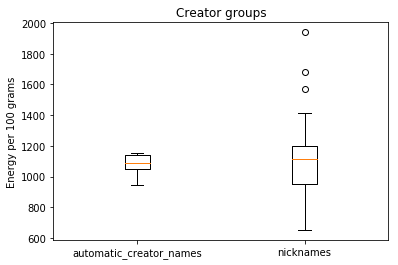

In [54]:
plt.boxplot([automatic_creator_names['energy_100g'].dropna(), nicknames['energy_100g'].dropna()], labels = ["automatic_creator_names", "nicknames"])
plt.ylabel("Energy per 100 grams")
plt.title('Creator groups')
plt.show()

I imediately notice that there are few strong outliers from the bigger group - nicknames. Apart from that, first group ( automatic names) are more symmetrically distributed that the second one. 

We have smaller samples here, so I chose to perform T-test. Usually , T and Z tests are quite similar, but T tests are used for smaller sample sizes ( up to 30). For more differencies and specific for both tests, please refer to the resources section and the link there.

The two hypothesis are as it follows:
H0 - there is no big difference between the means of the two categories.
H1 - there is indeed big difference between the means of the two categories. 


In [55]:
t, p = stats.ttest_ind(automatic_creator_names['energy_100g'].dropna(), nicknames['energy_100g'].dropna() , equal_var=False)

In [56]:
t, p

(-0.6726887534243889, 0.5058210756377424)

As we can see, p>0.05 ( usually 0.05 is known as alpha error and is used as the cutoff for significance). This mean that we cannot conclude that we have significant difference,therefore H0 is the correct one. 

# Conclusion

As a conslusion, I found some strong correlation coefficients, which were expected. I explored the data and cleaned it for the purposes of this analysis, but it turned out that the data itself is too messy, contains a lot of missing information and requires much deeper analysis.

I performed a T-test and proved that there is no significant difference between the means fo two group of creators. Actually, my aim is to perform a test based on grouped data by countries. For this purpose, I will need to modify the containt ( e.g. tranlaste some values and use only English language as official). 

The line followed here is correct one, but the results are not the best ones due to the initial data. I need more datasets, more time and analysis to come up with strong opinion. 

# Further development

This dataset is like an "open door" for lots of analysis. As further steps I would take the nutrition grades per countries, the values of vitamins and proteins in the food again per contries and commpare it to the health level in those countries. I will aim to verify if indeed there is a connection, and if we can rely on the given grade ( we all know that people tend to buy and consume what is recommended as nice goods, and what is evaluated  with higher grade. ) . There are similar themes for food facts per countries, which can be used ( e.g. for Germany - https://de.openfoodfacts.org/) .
<br><br> The expectation is that the connection will not be so strong and the results would not be smooth , but we need to explore. The most important details it to be very careful and not lose much of data during the cleaning process. 

# Resources
<br>1.  Source of the dataset - https://www.kaggle.com/openfoodfacts/world-food-facts/home
<br>2. Correlation matrix information - https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
<br>3. Statmodels in python - https://www.statsmodels.org/stable/index.html
